# Reading Multi Spectral Images

https://nbviewer.jupyter.org/github/thomasaarholt/hyperspy-demos/blob/master/2_SVD_and_BSS.ipynb


## Multispectral Imagery
Images obtained with a ADC Lite - Tetracam's Lightweight ADC

I made pitures about: 

>Aluminum , Copper, Brass, Iron, Stainless Steel, Painted Iron 

http://tetracam.com/Products-ADC_Lite.htm

MRobalinho - 19-04-2019

## Add Libraries

In [1]:
# Add libraries
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageFilter, ImageOps
from openpyxl import load_workbook

In [2]:
# Clear all
os.system( 'cls' )

# Verify my current folder
currDir = os.path.dirname(os.path.realpath("__file__"))
mypath = currDir
print(currDir)  

C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook


In [3]:
# Path to the image files
folder = "imagedata05"

# Part name of file to filter files
end_file = ".jpg"

# Upper End File
#end_file = end_file.upper()
path = currDir + "/" + folder + "/"
end_file

'.jpg'

## Read images from folder

In [4]:
# Read files from folder
print(path)
print('-')
print(' ---- IMAGES ON THE FOLDER :', folder, '------- *', end_file)

list_of_images = list()  # save all images on folder for further processing 

for file in os.listdir(path):
    if file.endswith(end_file):
        print(os.path.join(file))
        list_of_images.append(file)   # save all images on folder for further processing 
print('-')        

C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/
-
 ---- IMAGES ON THE FOLDER : imagedata05 ------- * .jpg
Aluminum_1.jpg
Aluminum_2.jpg
Aluminum_3.jpg
Brass_1.jpg
Brass_2.jpg
Brass_3.jpg
Brass_4.jpg
Brass_5.jpg
CopperWire_1.jpg
CopperWire_2.jpg
CopperWire_3.jpg
Copper_1.jpg
Copper_2.jpg
Copper_3.jpg
Copper_4.jpg
Iron_1.jpg
Iron_2.jpg
Iron_3.jpg
PaintedIron_1.jpg
PaintedIron_2.jpg
StainlessSteel_1.jpg
StainlessSteel_2.jpg
StainlessSteel_3.jpg
-


In [5]:
# Create Data Frame with image information
df_image = []

## Functions to the work

In [6]:
# Read image with PIL
from PIL import Image, ImageFilter, ImageOps
def read_pil_image(file1):
    #print('Reading PIL image:', file1)
    try:
        im_pil = Image.open(file1)
    except:
        print("-->Unable to load image",file1)
    return im_pil

In [7]:
# Read image with OPENCV
import cv2
def read_cv2_image(file1):
    #print('Reading CV image:',file1)
    try:
        im_cv = cv2.imread(file1)
    except:
        print("-->Unable to load image",file1)
    return im_cv

In [8]:
# Look from an chanel from then image

def channel(img, n):
    """Isolate the nth channel from the image.

       n = 0: red, 1: green, 2: blue
    """
    a = np.array(img)
    a[:,:,(n!=0, n!=1, n!=2)] *= 0
#   a[:,:,n] *= 0
#   print(Image.fromarray(a), 'Get Channel n: ', n)

    print('Get Channel n: ', n)
    return Image.fromarray(a)

# def to resize 
# Given parameters : image , number to divide (resize)
def imageResize(img, n):
    width, height = img.size 

    print('Original size:', width, '/', height, 'Resize:',n)
    
    newWidth = int(width / n)
    newHeight = int(height / n)
    img.resize((newWidth, newHeight), Image.ANTIALIAS)
    print('New size:', newWidth, '/', newHeight)
    return img

In [9]:
# Obtain main color from image
# https://convertingcolors.com/rgb-color-169_171_170.html
    
def get_main_color(path, file):
    #img = Image.open(path+file)
    file1 = path+file
    # Read image
    img = read_pil_image(file1)
    if img == None:
        print("-->Unable to load image",file1)
        
    colors = img.getcolors( 1024*1024) #put a higher value if there are many colors in your image
    print('Get main Color file:', file)
    max_occurence, most_present = 0, 0
    try:
        for c in colors:
            if c[0] > max_occurence:
                (max_occurence, most_present) = c
        return most_present
    except TypeError:
        raise Exception("Too many colors in the image")

In [10]:
#!/usr/bin/python

# Return one 24-bit color value 
def rgbToDecimal(x_rgb):
    r,g,b = rgbToRGB(x_rgb)
    rgb_dec = (r << 16) + (g << 8) + b
    #print('RGB Color:', x_rgb, '   Dec:', rgb_dec)
    return rgb_dec

# Convert 24-bit color value to RGB
def colorToRGB(c):
    r = c >> 16
    c -= r * 65536;
    g = c / 256
    c -= g * 256;
    b = c
    return [r, g, b]

def rgbToRGB(x_rgb):
    x_rgb = list(x_rgb)
    r = x_rgb[0]
    g = x_rgb[1]
    b = x_rgb[2]

    #print('rgbToRGB:',x_rgb, r,g,b)
    return r, g, b

def getRGBfromI(RGBint):
    blue =  RGBint & 255
    green = (RGBint >> 8) & 255
    red =   (RGBint >> 16) & 255
    return red, green, blue

def getIfromRGB(rgb):
    red = rgb[0]
    green = rgb[1]
    blue = rgb[2]
    #print('getIfromRGB:', red, green, blue)
    RGBint = (red<<16) + (green<<8) + blue
    return RGBint

# RGB to Hex Decimal
def rgb_to_hex(rgb):
    rgb_int = bytes(rgb).hex()
    rgb_dec = '#'+str(rgb_int)
    #print('RGB :',rgb, '  Hex Dec:', rgb_dec)
    return rgb_dec

# Test
#x_rgb = (254, 250, 255)
#rgb_hex = rgb_to_hex(x_rgb)
#rgb_dec = rgbToDecimal(x_rgb)

In [11]:
# https://github.com/conda-forge/webcolors-feedstock
# conda config --add channels conda-forge
# conda install webcolors
# It is possible to list all of the versions of webcolors available on your platform with:
#       conda search webcolors --channel conda-forge

# COLOR NAME
import webcolors
def get_color_name(rgb_x):
    min_colours = {}
    for key, name in webcolors.css21_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - rgb_x[0]) ** 2
        gd = (g_c - rgb_x[1]) ** 2
        bd = (b_c - rgb_x[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    print('Color name from RGB:',rgb_x,'  is :',min_colours[min(min_colours.keys())])
    return min_colours[min(min_colours.keys())]

In [12]:
# Get color name from RGB
# https://stackoverflow.com/questions/2453344/find-the-colour-name-from-a-hexadecimal-colour-code

colorof = {'#F0F8FF':"aliceblue",
'#FAEBD7':"antiquewhite",
'#00FFFF':"aqua",
'#7FFFD4':"aquamarine",
'#F0FFFF':"azure",
'#F5F5DC':"beige",
'#FFE4C4':"bisque",
'#000000':"black",
'#FFEBCD':"blanchedalmond",
'#0000FF':"blue",
'#8A2BE2':"blueviolet",
'#A52A2A':"brown",
'#DEB887':"burlywood",
'#5F9EA0':"cadetblue",
'#7FFF00':"chartreuse",
'#D2691E':"chocolate",
'#FF7F50':"coral",
'#6495ED':"cornflowerblue",
'#FFF8DC':"cornsilk",
'#DC143C':"crimson",
'#00FFFF':"cyan",
'#00008B':"darkblue",
'#008B8B':"darkcyan",
'#B8860B':"darkgoldenrod",
'#A9A9A9':"darkgray",
'#006400':"darkgreen",
'#BDB76B':"darkkhaki",
'#8B008B':"darkmagenta",
'#556B2F':"darkolivegreen",
'#FF8C00':"darkorange",
'#9932CC':"darkorchid",
'#8B0000':"darkred",
'#E9967A':"darksalmon",
'#8FBC8B':"darkseagreen",
'#483D8B':"darkslateblue",
'#2F4F4F':"darkslategray",
'#00CED1':"darkturquoise",
'#9400D3':"darkviolet",
'#FF1493':"deeppink",
'#00BFFF':"deepskyblue",
'#696969':"dimgray",
'#1E90FF':"dodgerblue",
'#B22222':"firebrick",
'#FFFAF0':"floralwhite",
'#228B22':"forestgreen",
'#FF00FF':"fuchsia",
'#DCDCDC':"gainsboro",
'#F8F8FF':"ghostwhite",
'#FFD700':"gold",
'#DAA520':"goldenrod",
'#808080':"gray",
'#008000':"green",
'#ADFF2F':"greenyellow",
'#F0FFF0':"honeydew",
'#FF69B4':"hotpink",
'#CD5C5C':"indianred",
'#4B0082':"indigo",
'#FFFFF0':"ivory",
'#F0E68C':"khaki",
'#E6E6FA':"lavender",
'#FFF0F5':"lavenderblush",
'#7CFC00':"lawngreen",
'#FFFACD':"lemonchiffon",
'#ADD8E6':"lightblue",
'#F08080':"lightcoral",
'#E0FFFF':"lightcyan",
'#FAFAD2':"lightgoldenrodyellow",
'#D3D3D3':"lightgray",
'#90EE90':"lightgreen",
'#FFB6C1':"lightpink",
'#FFA07A':"lightsalmon",
'#20B2AA':"lightseagreen",
'#87CEFA':"lightskyblue",
'#778899':"lightslategray",
'#B0C4DE':"lightsteelblue",
'#FFFFE0':"lightyellow",
'#00FF00':"lime",
'#32CD32':"limegreen",
'#FAF0E6':"linen",
'#FF00FF':"magenta",
'#800000':"maroon",
'#66CDAA':"mediumaquamarine",
'#0000CD':"mediumblue",
'#BA55D3':"mediumorchid",
'#9370DB':"mediumpurple",
'#3CB371':"mediumseagreen",
'#7B68EE':"mediumslateblue",
'#00FA9A':"mediumspringgreen",
'#48D1CC':"mediumturquoise",
'#C71585':"mediumvioletred",
'#191970':"midnightblue",
'#F5FFFA':"mintcream",
'#FFE4E1':"mistyrose",
'#FFE4B5':"moccasin",
'#FFDEAD':"navajowhite",
'#000080':"navy",
'#FDF5E6':"oldlace",
'#808000':"olive",
'#6B8E23':"olivedrab",
'#FFA500':"orange",
'#FF4500':"orangered",
'#DA70D6':"orchid",
'#EEE8AA':"palegoldenrod",
'#98FB98':"palegreen",
'#AFEEEE':"paleturquoise",
'#DB7093':"palevioletred",
'#FFEFD5':"papayawhip",
'#FFDAB9':"peachpuff",
'#CD853F':"peru",
'#FFC0CB':"pink",
'#DDA0DD':"plum",
'#B0E0E6':"powderblue",
'#800080':"purple",
'#FF0000':"red",
'#BC8F8F':"rosybrown",
'#4169E1':"royalblue",
'#8B4513':"saddlebrown",
'#FA8072':"salmon",
'#F4A460':"sandybrown",
'#2E8B57':"seagreen",
'#FFF5EE':"seashell",
'#A0522D':"sienna",
'#C0C0C0':"silver",
'#87CEEB':"skyblue",
'#6A5ACD':"slateblue",
'#708090':"slategray",
'#FFFAFA':"snow",
'#00FF7F':"springgreen",
'#4682B4':"steelblue",
'#D2B48C':"tan",
'#008080':"teal",
'#D8BFD8':"thistle",
'#FF6347':"tomato",
'#40E0D0':"turquoise",
'#EE82EE':"violet",
'#F5DEB3':"wheat",
'#FFFFFF':"white",
'#F5F5F5':"whitesmoke",
'#FFFF00':"yellow",
'#9ACD32':"yellowgreen"}


def get_rgb_color_name(rgb):
    
    hex_from_rgb = rgb_to_hex(rgb)  # transform RGB into hexadecimal
    hx = hex_from_rgb[1:8]
    #print(hx)
    # if color is found in dict
    if colorof.get(hx):return colorof[hx]

    # else return its closest available color
    m = 16777215
    k = '000000'
    for key in colorof.keys():
        key_color = key[1:8]
        #print(key_color)
        a = int(hx[:2],16)-int(key_color[:2],16)
        b = int(hx[2:4],16)-int(key_color[2:4],16)
        c = int(hx[4:],16)-int(key_color[4:],16)

        v = a*a+b*b+c*c # simple measure for distance between colors

        # v = (r1 - r2)^2 + (g1 - g2)^2 + (b1 - b2)^2

        if v <= m:
            m = v
            k = key

    return colorof[k], hex_from_rgb

# Test
#rgb_1 = (216, 220, 223)
#cname, hexdc = get_rgb_color_name(rgb_1)
#print('Found:',    cname, '  Hex:', hexdc)     # found in dict

In [13]:
# Increase the contrast image
# im - image
# xvalue = contrast value
# https://pillow.readthedocs.io/en/4.0.x/reference/ImageEnhance.html
from PIL import ImageEnhance
# Path + file name + numeric value to enhancement

def contrast(path, xfile, xvalue):
    print('   Enhance image:', xfile, '  Value:', xvalue)
    file1 = path + xfile
    # Read Image
    im = read_pil_image(file1)
    if im == None:
        print("-->Unable to load image",file1)
    
    enh = ImageEnhance.Contrast(im)
    # enh.enhance(1.0).show("30% more contrast")
    x_enh = enh.enhance(xvalue)
     # Create name file masked
    f2_file = 'Enh_' + xfile
    print('   Save enhanced file :', f2_file)
    x_enh.save(f2_file)  # save enhanced file
    return x_enh, f2_file

In [14]:
# Return RGB separately
def return_rgb_from_RGB(rgb):
    p_rgb = list(rgb)
    red   = p_rgb[0]
    green = p_rgb[1]
    blue  = p_rgb[2]
    return red, green, blue

In [15]:
# Return distance from 2 colors

# http://hanzratech.in/2015/01/16/color-difference-between-2-colors-using-python.html
# https://python-colormath.readthedocs.io/en/latest/delta_e.html#delta-e-cie-2000

from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000

def delta_2_colors(rgb_1, rgb_2):
    #print('   Delta colors: ', rgb_1, rgb_2)
    #---- first color
    xr, xg, xb = return_rgb_from_RGB(rgb_1)
    # Red Color
    color1_rgb = sRGBColor(xr, xg, xb)

    #--- other color
    rgb_1 = rgb_2
    xr, xg, xb = return_rgb_from_RGB(rgb_1)
    # Blue Color
    color2_rgb = sRGBColor(xr, xg, xb)

    # Convert from RGB to Lab Color Space
    color1_lab = convert_color(color1_rgb, LabColor)

    # Convert from RGB to Lab Color Space
    color2_lab = convert_color(color2_rgb, LabColor)

    # Find the color difference
    delta_e = delta_e_cie2000(color1_lab, color2_lab)

    #print("      The difference between the 2 color = ", delta_e)
    return delta_e

In [16]:
# Remove Background - Put red background
#https://stackoverflow.com/questions/29313667/how-do-i-remove-the-background-from-this-kind-of-image
    
import cv2
import numpy as np

def red_background(path, xfile):
    print('   Red background for image:', xfile)
    #== Parameters =======================================================================
    BLUR = 21
    CANNY_THRESH_1 = 10
    CANNY_THRESH_2 = 100
    MASK_DILATE_ITER = 10
    MASK_ERODE_ITER = 10
    MASK_COLOR = (0.0,0.0,1.0) # In BGR format

    #== Processing =======================================================================
    file1 = path + xfile
    #-- Read image -----------------------------------------------------------------------
    #img = cv2.imread(file1)
    # Read image
    img = read_cv2_image(file1)
    if img.any() == None:
        print("-->Unable to load image",file1)
    
    # Create GRAY Image
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    #-- Edge detection -------------------------------------------------------------------
    edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
    edges = cv2.dilate(edges, None)
    edges = cv2.erode(edges, None)

    #-- Find contours in edges, sort by area ---------------------------------------------
    contour_info = []
    _, contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    for c in contours:
        contour_info.append((
            c,
            cv2.isContourConvex(c),
            cv2.contourArea(c),
        ))
    contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
    max_contour = contour_info[0]

    #-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
    # Mask is black, polygon is white
    mask = np.zeros(edges.shape)
    for c in contour_info:
        cv2.fillConvexPoly(mask, c[0], (255))

    #-- Smooth mask, then blur it
    mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
    mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
    mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
    mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

    #-- Blend masked img into MASK_COLOR background
    mask_stack  = mask_stack.astype('float32') / 255.0         
    img         = img.astype('float32') / 255.0    
    masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR)  
    masked = (masked * 255).astype('uint8')                    
    
    cv2.imwrite(path+"MASK_"+xfile,masked)
    
    # Create name file masked
    f2_file = 'Mask_'+ xfile
    file2 = path + f2_file
    
    # Write masked image on disk
    print('   Save masked image with red background:', f2_file)
    cv2.imwrite(file2, masked)           # Save
    # Return name file masked and image masked
    return f2_file, masked

# Test
'''
xfile = 'Brass_001.tif'
f2_file, masked = red_background(path,xfile)
%matplotlib inline
plt.imshow(masked)
plt.title('Remove image background:'+xfile,fontsize=20)
plt.show()
'''

"\nxfile = 'Brass_001.tif'\nf2_file, masked = red_background(path,xfile)\n%matplotlib inline\nplt.imshow(masked)\nplt.title('Remove image background:'+xfile,fontsize=20)\nplt.show()\n"

In [17]:
# https://convertingcolors.com/rgb-color-169_171_170.html

# return most_present RGB, RGB, color name, list RGB colors without RED, list RGB colors without back

import collections

def get_main_color_without_red_and_floor(path, f2_file):
    print('    Main color from image:', f2_file)
    file1 = path + f2_file
    
    # Read image
    img = read_pil_image(file1)
    if img == None:
        print("-->Unable to load image",file1)
        
    colors = img.getcolors( 1024*1024) #put a higher value if there are many colors in your image
    #-----
    # Create list with colors without Background red color (near Background color)
    list_non_back = list()
    list_dec_back = list()   # List from decimal colors to list_non_back
    #
    print('...  List without excluded colors')
    # Convert list to decimal color
    for color in colors:
        # Diference between colors
       # print(color[1])
        rgb = color[1]

        excluded_rgb = False
        
        #Verify color name
        xt_color_name , hexdc = get_rgb_color_name(rgb)
        
        # Exclusion for some colors (Red Backgroud, Black foor, etc)
        if "red"   in xt_color_name: 
             excluded_rgb = True
        if "black" in xt_color_name:        
             excluded_rgb = True
        if "white" in xt_color_name:
            excluded_rgb = True
        if "cream" in xt_color_name:
            excluded_rgb = True             
        
        # Force Only for non-tif files we do not delete anything
        if file.endswith('.tif'):
            excluded_rgb = False
    
        if  excluded_rgb == True:     # Exclude COLOR  
            #print("Cor excluida", rgb, xt_color_name )
            excluded_rgb = True
        else:
            # OK COLOR - Save color in the list of correct colors (list_non_back)
            #print("Cor OK", rgb, xt_color_name )
            list_non_back.append(rgb)
            # Decimal color
            rgb_dec    = rgbToDecimal(rgb)
            list_dec_back.append(rgb_dec)   
  
    #-----
    print('Count ocurrencies for color')
    most_present = 0

    # Most common color in the list - list_non_back
    x = collections.Counter(list_non_back)
    print('      4 Most common colors:', x.most_common(4))  # Five most common colors
    most_present = x.most_common(1)
    xrgb = list_non_back[0] # common color
    
    # ----- color name --
    #xt_color_name = get_color_name(xrgb)
    print('      Read color name:', xrgb)  # Color name from RGB
    xt_color_name , hexdc = get_rgb_color_name(xrgb)
    print('      Main Color file:', f2_file, ' RGB:', most_present, xrgb, ' Color name:', xt_color_name,' Hex:',hexdc)
    
    return most_present, xrgb, xt_color_name, list_non_back, list_dec_back

# Test
#xfile = 'Copper_001.tif'
#most_present, xrgb, xt_color_name, list_non_back, \
#     list_dec_back = get_main_color_without_red_and_floor(path, xfile)

In [18]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html
# Print histogram using Opencv
import cv2
import numpy as np
from matplotlib import pyplot as plt

def print_cv_hist(path, xfile):
    file1 = path + xfile
    print('Cv2 Hist from file:', file1)
    
    # Read image
    img_cv = read_cv2_image(file1)
    if img_cv.any() == None:
        print("-->Unable to load image",file1)

    # create a mask
    mask = np.zeros(img_cv.shape[:2], np.uint8)

    # define area to extract image from original
    #    Left:height , right:length
    mask[200:1400, 200:1800] = 255
    masked_img = cv2.bitwise_and(img_cv, img_cv ,mask = mask)

    # Calculate histogram with mask and without mask
    # Check third argument for mask
    hist_full = cv2.calcHist([img_cv],[0],None,[256],[0,256])
    hist_mask = cv2.calcHist([img_cv],[0],mask,[256],[0,256])

    plt.figure(figsize=(18,5))

    plt.subplot(141), plt.imshow(img_cv, 'gray')
    plt.title("Original")

    plt.subplot(142), plt.imshow(mask,'gray')
    plt.title('Mask')

    plt.subplot(143), plt.imshow(masked_img, 'gray')
    plt.title('Masked image')


    ax=plt.subplot(144), plt.plot(hist_full), plt.plot(hist_mask)
    ax = plt.gca()
    ax.grid(True)
    plt.title('Histogram')
    plt.xlim([0,256])

    plt.suptitle('IMAGE HISTOGRAM',fontsize=18)
    plt.xlabel('Image:'+xfile,fontsize=18)
    plt.ylabel('All chanels',fontsize=10)
    plt.savefig(path+'Hist_cv2_'+xfile)   # Save Histograme Figure
    plt.show()
    return

# Test
#xfile = 'Copper_001.tif'
#print_cv_hist(path, xfile)

In [19]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html
# Print histogram using Opencv and matplotlib

import cv2
import numpy as np
from matplotlib import pyplot as plt

def print_matplot_hist(path, xfile):
    file1 = path + xfile   
    print('Matplot Hist from file:', file1)
    
    # Read image
    img_mp = read_cv2_image(file1)
    if img_mp.any() == None:
        print("-->Unable to load image",file1)
    
    color = ('b','g','r')
    ax = plt.figure(figsize=(10,5))
    ax = plt.gca()
    ax.grid(True)
    
    for i,col in enumerate(color):
        histr = cv2.calcHist([img_mp],[i],None,[256],[0,256])
        plt.plot(histr,color = col, label='Band '+col.upper())
        plt.xlim([0,256])

    plt.title('Histogram of the image',fontsize=20)
    plt.xlabel('Image:'+xfile,fontsize=18)
    plt.ylabel('All chanels',fontsize=18)
    plt.legend(bbox_to_anchor=(.90,0.85),bbox_transform=plt.gcf().transFigure)
    plt.savefig(path+'Hist_'+xfile)   # Save Histograme Figure
    plt.show()   
        
    return

# Test
#xfile = 'Copper_1.tif'
#print_matplot_hist(path, xfile)

In [20]:
# Max and Min value from Histogram and each position
#l = np.array(hist_full).tolist()  - Transform array in a list

import cv2
import numpy as np
from matplotlib import pyplot as plt

def histogram_max_min(path, xfile):

    file1 = path+xfile
    print('Histogram analisys:', file1)
    
    # Read image
    imgh = read_cv2_image(file1)
    if imgh.any() == None:
        print("-->Unable to load image",file1)

    # Calculate histogram without mask
    hist_full = cv2.calcHist([imgh],[0],None,[256],[0,256])
 
    # Transform array in a list
    hist_list = np.array(hist_full).tolist()

    # Valor maximo e minimo do Histograma e sua posição
    val_max  = max(hist_list)
    xval_max = int(val_max[0])
 
    val_avg  =  max(hist_list) 
    xval_avg = int(val_avg[0]) / len(hist_list)
    xval_avg = int(xval_avg)
    
    val_min  = min(hist_list)
    xval_min = int(val_min[0])
    
    idx_max = hist_list.index(val_max)
    idx_min = hist_list.index(val_min)
    
    #print("Valor Max Histograma:", xval_max, '  Posição do valor Max:', idx_max)
    #print("Valor Min Histograma:", xval_min, '  Posição do valor Min:', idx_min)
    #print("Valor Avg Histograma:", xval_avg)
  
    return xval_max, idx_max, xval_min, idx_min

# Test
#xfile = 'Copper_001.tif'
#_,_,_,_ = histogram_max_min(path, xfile)
 

In [21]:
# Read image folder
import glob, os
def get_image_folder(xfile1):
    # Path to the image files
    path = currDir + "/" + folder + "/"
    # File
    file1 = path + xfile1
    print(file1)
    
    return file1

In [22]:
# Print all the informations from image, and create a pandas data frame with the relevant information

def print_file(path, xfile):
    print('------------------------------------------------------------------------')   
    file1 = path + xfile
    
    # Read image
    tif_f1 = read_pil_image(file1)
    if tif_f1 == None:
        print("-->Unable to load image",file1)

    print('Inf.File:',xfile)

    # Transform Image to array
    aArray = np.array(tif_f1)
    # Array sum  
    xsum = aArray.sum() / 1000000
    
    # Get channel 0
    x0_channel = channel(tif_f1, 0)
    aArray = np.array(x0_channel)
    xsum_0 = aArray.sum() / 1000000  

    # Get channel 1
    x1_channel = channel(tif_f1, 1)
    aArray = np.array(x1_channel)
    xsum_1 = aArray.sum() / 1000000  

    # Get channel 2
    x2_channel = channel(tif_f1, 2)
    aArray = np.array(x2_channel)
    xsum_2 = aArray.sum() / 1000000  

    # Histogram from image
    aHist = tif_f1.histogram()
    hsum = sum(aHist) / 100000

    # Histogram channel 0
    aHist_0 = x0_channel.histogram()
    hsum_0 = sum(aHist_0) / 100000

    # Histogram channel 1
    aHist_1 = x1_channel.histogram()
    hsum_1 = sum(aHist_1) / 100000

    # Histogram chanel 0
    aHist_2 = x2_channel.histogram()
    hsum_2 = sum(aHist_2) / 100000

    # number elements on list
    nlist = len(aHist)
    
    # Max and Min from Histogram
    xval_max, idx_max, xval_min, idx_min = histogram_max_min(path, xfile)

    # Get color
    # Enhancement Contrast color for better definition
    # f1_file has the file name saved enhanced  
    xvalue = 2.0  
    print('Enhancement color:', xfile, '  Value:',xvalue)  
    x_enh, f1_file = contrast(path, xfile, xvalue)

    # Remove Background - Put red background
    # f2_file has the file name saved masked
    
    # Only red Background for NON tif files
    #xend_file = file.endswith('*.TIF').upper()
    if file.endswith('*.TIF'):
        f2_file = f1_file
        img_masked = tif_f1
    else:    
        file1 = path+f1_file  
        print('Red background:', path, f1_file)   
        f2_file, img_masked = red_background(path, f1_file)

    # Get Main Color - 
    print('Most common color:', path, f2_file)  
    
    # most present color, RGB from most present color:
    # color name , Hex from rgb , list colors withour red, list colors without back, decimal list colors without back
    most_present, xrgb, xt_color_name, list_non_back,list_dec_back = get_main_color_without_red_and_floor(path, f2_file) 
    
    # HEX fom most present color
    hex_color  = rgb_to_hex(xrgb)
    
    # Decimal from most present color
    rgb_dec    = rgbToDecimal(xrgb)
    #----
    # Get Extrems of the image
    extr_a = tif_f1.getextrema() 
    # Transform tuple in a list    
    extr_b = [x for sets in extr_a for x in sets]
    # Sum the list  
    sum_list = sum(extr_b) 
    med_extr  = sum_list / len(extr_b)
    #print('List Extremes:',extr_a,'Sum:',sum_list,'Len:', len(extr_b), 'Med:',med_extr)


    # Obtain name file without extension 
    sample_name = os.path.basename(xfile).split('_')[0]

    # Print information  
    print(sample_name,' Size:',tif_f1.size, ' Format:',tif_f1.format, ' Mode:', tif_f1.mode)
    print('          Sum array:',xsum, ' Sum Ch 0:', xsum_0, ' Sum Ch 1:', xsum_1, ' Sum Ch 2:', xsum_2)      
    print('          Histog   :',hsum ,'  N.List elem:', nlist, ' Max:', xval_max, 'Idx Max:', idx_max, '  Min:', xval_min, 'Idx Min:', idx_min )
    print('          Color    :',xt_color_name,'   RGB   :',xrgb, '   Hex color:', hex_color,'  Dec Color:',rgb_dec)
    print('          Extremes :',extr_a, 'Med Extremes:',med_extr)

    # insert information in a Pandas Data Frame
    df_image.append((folder, xfile, sample_name, tif_f1.size, tif_f1.format, tif_f1.mode , 
                       xsum, xsum_0, xsum_1, xsum_2, hsum, nlist, xt_color_name, xrgb, hex_color, 
                       rgb_dec, med_extr, xval_max, idx_max, xval_min, idx_min))
    
    return most_present, xrgb, xt_color_name, list_non_back, list_dec_back
 

# Starting image analysis

In [23]:
# Create Data Frame with image information
df_image = []

xend_file = "*" + end_file
# change work to folder path
os.chdir(path)
print('Analysing Images from:',path, xend_file)

for file in glob.glob(xend_file):
    list_dec_back = list() # List with decimal colors in the image
    print(file)
    most_present, xrgb, xt_color_name, list_non_back, list_dec_back = print_file(path,file)

Analysing Images from: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/ *.jpg
Aluminum_1.jpg
------------------------------------------------------------------------
Inf.File: Aluminum_1.jpg
Get Channel n:  0
Get Channel n:  1
Get Channel n:  2
Histogram analisys: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Aluminum_1.jpg
Enhancement color: Aluminum_1.jpg   Value: 2.0
   Enhance image: Aluminum_1.jpg   Value: 2.0
   Save enhanced file : Enh_Aluminum_1.jpg
Red background: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/ Enh_Aluminum_1.jpg
   Red background for image: Enh_Aluminum_1.jpg
   Save masked image with red background: Mask_Enh_Aluminum_1.jpg
Most common color: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_

Brass  Size: (5312, 2988)  Format: JPEG  Mode: RGB
          Sum array: 3042.322194  Sum Ch 0: 2557.932421  Sum Ch 1: 2458.105183  Sum Ch 2: 2321.251886
          Histog   : 476.16768   N.List elem: 768  Max: 179769 Idx Max: 169   Min: 7 Idx Min: 2
          Color    : azure    RGB   : (244, 255, 255)    Hex color: #f4ffff   Dec Color: 16056319
          Extremes : ((23, 255), (15, 255), (0, 255)) Med Extremes: 133.83333333333334
Brass_3.jpg
------------------------------------------------------------------------
Inf.File: Brass_3.jpg
Get Channel n:  0
Get Channel n:  1
Get Channel n:  2
Histogram analisys: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Brass_3.jpg
Enhancement color: Brass_3.jpg   Value: 2.0
   Enhance image: Brass_3.jpg   Value: 2.0
   Save enhanced file : Enh_Brass_3.jpg
Red background: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/

Inf.File: CopperWire_3.jpg
Get Channel n:  0
Get Channel n:  1
Get Channel n:  2
Histogram analisys: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/CopperWire_3.jpg
Enhancement color: CopperWire_3.jpg   Value: 2.0
   Enhance image: CopperWire_3.jpg   Value: 2.0
   Save enhanced file : Enh_CopperWire_3.jpg
Red background: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/ Enh_CopperWire_3.jpg
   Red background for image: Enh_CopperWire_3.jpg
   Save masked image with red background: Mask_Enh_CopperWire_3.jpg
Most common color: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/ Mask_Enh_CopperWire_3.jpg
    Main color from image: Mask_Enh_CopperWire_3.jpg
...  List without excluded colors
Count ocurrencies for color
      4 Most common colors: [((244, 255, 255), 1), ((243, 25

Iron_1.jpg
------------------------------------------------------------------------
Inf.File: Iron_1.jpg
Get Channel n:  0
Get Channel n:  1
Get Channel n:  2
Histogram analisys: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Iron_1.jpg
Enhancement color: Iron_1.jpg   Value: 2.0
   Enhance image: Iron_1.jpg   Value: 2.0
   Save enhanced file : Enh_Iron_1.jpg
Red background: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/ Enh_Iron_1.jpg
   Red background for image: Enh_Iron_1.jpg
   Save masked image with red background: Mask_Enh_Iron_1.jpg
Most common color: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/ Mask_Enh_Iron_1.jpg
    Main color from image: Mask_Enh_Iron_1.jpg
...  List without excluded colors
Count ocurrencies for color
      4 Most common colors: [((244, 

Get Channel n:  0
Get Channel n:  1
Get Channel n:  2
Histogram analisys: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/StainlessSteel_1.jpg
Enhancement color: StainlessSteel_1.jpg   Value: 2.0
   Enhance image: StainlessSteel_1.jpg   Value: 2.0
   Save enhanced file : Enh_StainlessSteel_1.jpg
Red background: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/ Enh_StainlessSteel_1.jpg
   Red background for image: Enh_StainlessSteel_1.jpg
   Save masked image with red background: Mask_Enh_StainlessSteel_1.jpg
Most common color: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/ Mask_Enh_StainlessSteel_1.jpg
    Main color from image: Mask_Enh_StainlessSteel_1.jpg
...  List without excluded colors
Count ocurrencies for color
      4 Most common colors: [((253, 255, 223), 1), 

In [24]:
#list_dec_back ordered
order_list_dec = sorted(list_dec_back, key=int) 
#order_list_dec
#list_non_back 

In [25]:
'''
TESTS
# Read all list to see the color - obtain RGB from int
for x in order_list_dec:
    #print(x)
    # Get RGB from INT
    xrgb = getRGBfromI(x)
    #print('Int:, x,'  RGB: ',xrgb)
    xt_color_name , hexdc = get_rgb_color_name(xrgb)
    print('Int:', x,'  RGB: ', xrgb, xt_color_name)
'''          

"\nTESTS\n# Read all list to see the color - obtain RGB from int\nfor x in order_list_dec:\n    #print(x)\n    # Get RGB from INT\n    xrgb = getRGBfromI(x)\n    #print('Int:, x,'  RGB: ',xrgb)\n    xt_color_name , hexdc = get_rgb_color_name(xrgb)\n    print('Int:', x,'  RGB: ', xrgb, xt_color_name)\n"

In [26]:
df = pd.DataFrame(df_image,columns=['Folder','File','Material','Size','Format','Mode',
                                    'All_Bands', 'Sum_Ch0','Sum_Ch1','Sum_Ch2',
                                    'Histogram','Number_elements',
                                    'Color','Color_RGB', 'Color_hex','Color_dec','Med_Extrems',
                                    'Max_Histog', 'Idx_Max_Histog','Min_Histog', 'Idx_Min_Histog'])
df.head(50)

Folder                  File        Material          Size Format  \
0   imagedata05        Aluminum_1.jpg        Aluminum  (5312, 2988)   JPEG   
1   imagedata05        Aluminum_2.jpg        Aluminum  (5312, 2988)   JPEG   
2   imagedata05        Aluminum_3.jpg        Aluminum  (5312, 2988)   JPEG   
3   imagedata05           Brass_1.jpg           Brass  (5312, 2988)   JPEG   
4   imagedata05           Brass_2.jpg           Brass  (5312, 2988)   JPEG   
5   imagedata05           Brass_3.jpg           Brass  (5312, 2988)   JPEG   
6   imagedata05           Brass_4.jpg           Brass  (5312, 2988)   JPEG   
7   imagedata05           Brass_5.jpg           Brass  (5312, 2988)   JPEG   
8   imagedata05      CopperWire_1.jpg      CopperWire  (5312, 2988)   JPEG   
9   imagedata05      CopperWire_2.jpg      CopperWire  (5312, 2988)   JPEG   
10  imagedata05      CopperWire_3.jpg      CopperWire  (5312, 2988)   JPEG   
11  imagedata05          Copper_1.jpg          Copper  (5312, 2988)   JPEG   
12  imagedata05          Copper_2.jpg          Copper  (5312, 2988)   JPEG   
13  imagedata05          Copper_3.jpg          Copper  (5312, 2988)   JPEG   
14  imagedata05          Copper_4.jpg          Copper  (5312, 2988)   JPEG   
15  imagedata05            Iron_1.jpg            Iron  (5312, 2988)   JPEG   
16  imagedata05            Iron_2.jpg            Iron  (5312, 2988)   JPEG   
17  imagedata05            Iron_3.jpg            Iron  (5312, 2988)   JPEG   
18  imagedata05     PaintedIron_1.jpg     PaintedIron  (5312, 2988)   JPEG   
19  imagedata05     PaintedIron_2.jpg     PaintedIron  (5312, 2988)   JPEG   
20  imagedata05  StainlessSteel_1.jpg  StainlessSteel  (5312, 2988)   JPEG   
21  imagedata05  StainlessSteel_2.jpg  StainlessSteel  (5312, 2988)   JPEG   
22  imagedata05  StainlessSteel_3.jpg  StainlessSteel  (5312, 2988)   JPEG   

   Mode    All_Bands      Sum_Ch0      Sum_Ch1      Sum_Ch2       ...        \
0   RGB  2195.247943  2168.407625  2181.081817  2140.725797       ...         
1   RGB  2257.032332  2187.401438  2200.808299  2163.789891       ...         
2   RGB  2380.904071  2235.251031  2235.978671  2204.641665       ...         
3   RGB  2347.971869  2256.695208  2224.776302  2161.467655       ...         
4   RGB  3042.322194  2557.932421  2458.105183  2321.251886       ...         
5   RGB  2343.831242  2255.419735  2226.972316  2156.406487       ...         
6   RGB  2305.312821  2270.568593  2204.614105  2125.097419       ...         
7   RGB  2491.403767  2301.781831  2269.732149  2214.857083       ...         
8   RGB   267.892644  1556.587269  1522.765520  1483.507151       ...         
9   RGB   400.634317  1608.228710  1563.715691  1523.657212       ...         
10  RGB   555.143850  1658.528294  1611.116925  1580.465927       ...         
11  RGB  2475.739855  2340.824072  2233.916684  2195.966395       ...         
12  RGB  2512.756599  2351.116814  2245.775493  2210.831588       ...         
13  RGB  3403.152445  2732.991551  2548.093134  2417.035056       ...         
14  RGB  2524.999454  2367.930725  2244.869608  2207.166417       ...         
15  RGB  2125.839781  2155.840271  2139.247180  2125.719626       ...         
16  RGB  2058.051761  2137.300730  2122.972972  2092.745355       ...         
17  RGB  2034.603394  2123.156255  2114.419050  2091.995385       ...         
18  RGB  2388.517537  2242.175234  2244.439610  2196.869989       ...         
19  RGB  2406.412176  2244.088768  2251.928704  2205.362000       ...         
20  RGB  2169.327805  2168.962604  2165.083051  2130.249446       ...         
21  RGB  1963.320855  2107.296881  2094.155125  2056.836145       ...         
22  RGB  1840.495744  2073.778109  2056.034992  2005.649939       ...         

    Number_elements          Color        Color_RGB Color_hex Color_dec  \
0               768    lightyellow  (255, 255, 223)   #ffffdf  16777183   
1               768    lightyellow  (255, 255, 223)   #ffffdf  16777183   
2             

In [27]:
# Delete junk records
df = df[df.Material != 'MASK']
df = df[df.Material != 'Enh']
df

Folder                  File        Material          Size Format  \
0   imagedata05        Aluminum_1.jpg        Aluminum  (5312, 2988)   JPEG   
1   imagedata05        Aluminum_2.jpg        Aluminum  (5312, 2988)   JPEG   
2   imagedata05        Aluminum_3.jpg        Aluminum  (5312, 2988)   JPEG   
3   imagedata05           Brass_1.jpg           Brass  (5312, 2988)   JPEG   
4   imagedata05           Brass_2.jpg           Brass  (5312, 2988)   JPEG   
5   imagedata05           Brass_3.jpg           Brass  (5312, 2988)   JPEG   
6   imagedata05           Brass_4.jpg           Brass  (5312, 2988)   JPEG   
7   imagedata05           Brass_5.jpg           Brass  (5312, 2988)   JPEG   
8   imagedata05      CopperWire_1.jpg      CopperWire  (5312, 2988)   JPEG   
9   imagedata05      CopperWire_2.jpg      CopperWire  (5312, 2988)   JPEG   
10  imagedata05      CopperWire_3.jpg      CopperWire  (5312, 2988)   JPEG   
11  imagedata05          Copper_1.jpg          Copper  (5312, 2988)   JPEG   
12  imagedata05          Copper_2.jpg          Copper  (5312, 2988)   JPEG   
13  imagedata05          Copper_3.jpg          Copper  (5312, 2988)   JPEG   
14  imagedata05          Copper_4.jpg          Copper  (5312, 2988)   JPEG   
15  imagedata05            Iron_1.jpg            Iron  (5312, 2988)   JPEG   
16  imagedata05            Iron_2.jpg            Iron  (5312, 2988)   JPEG   
17  imagedata05            Iron_3.jpg            Iron  (5312, 2988)   JPEG   
18  imagedata05     PaintedIron_1.jpg     PaintedIron  (5312, 2988)   JPEG   
19  imagedata05     PaintedIron_2.jpg     PaintedIron  (5312, 2988)   JPEG   
20  imagedata05  StainlessSteel_1.jpg  StainlessSteel  (5312, 2988)   JPEG   
21  imagedata05  StainlessSteel_2.jpg  StainlessSteel  (5312, 2988)   JPEG   
22  imagedata05  StainlessSteel_3.jpg  StainlessSteel  (5312, 2988)   JPEG   

   Mode    All_Bands      Sum_Ch0      Sum_Ch1      Sum_Ch2       ...        \
0   RGB  2195.247943  2168.407625  2181.081817  2140.725797       ...         
1   RGB  2257.032332  2187.401438  2200.808299  2163.789891       ...         
2   RGB  2380.904071  2235.251031  2235.978671  2204.641665       ...         
3   RGB  2347.971869  2256.695208  2224.776302  2161.467655       ...         
4   RGB  3042.322194  2557.932421  2458.105183  2321.251886       ...         
5   RGB  2343.831242  2255.419735  2226.972316  2156.406487       ...         
6   RGB  2305.312821  2270.568593  2204.614105  2125.097419       ...         
7   RGB  2491.403767  2301.781831  2269.732149  2214.857083       ...         
8   RGB   267.892644  1556.587269  1522.765520  1483.507151       ...         
9   RGB   400.634317  1608.228710  1563.715691  1523.657212       ...         
10  RGB   555.143850  1658.528294  1611.116925  1580.465927       ...         
11  RGB  2475.739855  2340.824072  2233.916684  2195.966395       ...         
12  RGB  2512.756599  2351.116814  2245.775493  2210.831588       ...         
13  RGB  3403.152445  2732.991551  2548.093134  2417.035056       ...         
14  RGB  2524.999454  2367.930725  2244.869608  2207.166417       ...         
15  RGB  2125.839781  2155.840271  2139.247180  2125.719626       ...         
16  RGB  2058.051761  2137.300730  2122.972972  2092.745355       ...         
17  RGB  2034.603394  2123.156255  2114.419050  2091.995385       ...         
18  RGB  2388.517537  2242.175234  2244.439610  2196.869989       ...         
19  RGB  2406.412176  2244.088768  2251.928704  2205.362000       ...         
20  RGB  2169.327805  2168.962604  2165.083051  2130.249446       ...         
21  RGB  1963.320855  2107.296881  2094.155125  2056.836145       ...         
22  RGB  1840.495744  2073.778109  2056.034992  2005.649939       ...         

    Number_elements          Color        Color_RGB Color_hex Color_dec  \
0               768    lightyellow  (255, 255, 223)   #ffffdf  16777183   
1               768    lightyellow  (255, 255, 223)   #ffffdf  16777183   
2             

## Write statistics in excel book

In [28]:
# Verify my current folder
path = mypath + r"/upt_data.xlsx"
print('Write statistics into file :', path)

# Block to Read excel old excel file
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book
# ------------------------

# Write statistics into excel file
#writer = pd.ExcelWriter(path, engine = 'xlsxwriter') # only for new excelfile
df.to_excel(writer, sheet_name = folder)
writer.save()
writer.close()

Write statistics into file : C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/upt_data.xlsx


## Plot

In [29]:
df_plot = pd.DataFrame(df, columns=["Material", "All_Bands", "Sum_Ch0", "Sum_Ch1", "Sum_Ch2",
                                    "Color", "Color_RGB", "Color_hex","Color_dec",
                                    "Med_Extrems", "Max_Histog", "Idx_Max_Histog","Min_Histog", "Idx_Min_Histog"])
df_plot


Material    All_Bands      Sum_Ch0      Sum_Ch1      Sum_Ch2  \
0         Aluminum  2195.247943  2168.407625  2181.081817  2140.725797   
1         Aluminum  2257.032332  2187.401438  2200.808299  2163.789891   
2         Aluminum  2380.904071  2235.251031  2235.978671  2204.641665   
3            Brass  2347.971869  2256.695208  2224.776302  2161.467655   
4            Brass  3042.322194  2557.932421  2458.105183  2321.251886   
5            Brass  2343.831242  2255.419735  2226.972316  2156.406487   
6            Brass  2305.312821  2270.568593  2204.614105  2125.097419   
7            Brass  2491.403767  2301.781831  2269.732149  2214.857083   
8       CopperWire   267.892644  1556.587269  1522.765520  1483.507151   
9       CopperWire   400.634317  1608.228710  1563.715691  1523.657212   
10      CopperWire   555.143850  1658.528294  1611.116925  1580.465927   
11          Copper  2475.739855  2340.824072  2233.916684  2195.966395   
12          Copper  2512.756599  2351.116814  2245.775493  2210.831588   
13          Copper  3403.152445  2732.991551  2548.093134  2417.035056   
14          Copper  2524.999454  2367.930725  2244.869608  2207.166417   
15            Iron  2125.839781  2155.840271  2139.247180  2125.719626   
16            Iron  2058.051761  2137.300730  2122.972972  2092.745355   
17            Iron  2034.603394  2123.156255  2114.419050  2091.995385   
18     PaintedIron  2388.517537  2242.175234  2244.439610  2196.869989   
19     PaintedIron  2406.412176  2244.088768  2251.928704  2205.362000   
20  StainlessSteel  2169.327805  2168.962604  2165.083051  2130.249446   
21  StainlessSteel  1963.320855  2107.296881  2094.155125  2056.836145   
22  StainlessSteel  1840.495744  2073.778109  2056.034992  2005.649939   

            Color        Color_RGB Color_hex  Color_dec  Med_Extrems  \
0     lightyellow  (255, 255, 223)   #ffffdf   16777183   126.666667   
1     lightyellow  (255, 255, 223)   #ffffdf   16777183   127.500000   
2     lightyellow  (255, 255, 223)   #ffffdf   16777183   127.666667   
3          maroon       (68, 6, 0)   #440600    4457984   107.500000   
4           azure  (244, 255, 255)   #f4ffff   16056319   133.833333   
5          maroon      (129, 0, 0)   #810000    8454144   101.166667   
6   palegoldenrod  (255, 255, 159)   #ffff9f   16777119   107.000000   
7          maroon       (84, 1, 0)   #540100    5505280   108.333333   
8          maroon       (66, 0, 0)   #420000    4325376   105.000000   
9           azure  (244, 255, 255)   #f4ffff   16056319   104.500000   
10          azure  (244, 255, 255)   #f4ffff   16056319   102.333333   
11      firebrick     (182, 29, 0)   #b61d00   11934976   103.666667   
12         maroon      (112, 4, 0)   #700400    7341056   102.166667   
13   lemonchiffon  (255, 255, 191)   #ffffbf   16777151   135.166667   
14      firebrick      (198, 1, 0)   #c60100   12976384   106.833333   
15          azure  (244, 255, 255)   #f4ffff   16056319   122.000000   
16    lightyellow  (248, 255, 223)   #f8ffdf   16318431   115.000000   
17          azure  (244, 255, 255)   #f4ffff   16056319   126.500000   
18         silver  (197, 200, 191)   #c5c8bf   12961983    90.000000   
19         silver  (200, 202, 191)   #c8cabf   13159103    89.666667   
20    lightyellow  (253, 255, 223)   #fdffdf   16646111   127.500000   
21          azure  (244, 255, 255)   #f4ffff   16056319   127.500000   
22          azure  (244, 255, 255)   #f4ffff   16056319   127.500000   

    Max_Histog  Idx_Max_Histog  Min_Histog  Idx_Min_Histog  
0       772408             145           0             249  
1       834109             147           1             252  
2       793803             149           1               1  
3      1062442             166           0             194  
4       179769             169           7               2  
5       728137             166           0             190  
6       829206             180           0             200  
7      1252007  

In [30]:
# Adjust values to plot
df_plot.Sum_Ch0        = df_plot.Sum_Ch0 + 500 # to have diference lines during plot
df_plot.Sum_Ch1        = df_plot.Sum_Ch1 + 1000
df_plot.Sum_Ch2        = df_plot.Sum_Ch2 + 1500
df_plot.All_Bands      = df_plot.All_Bands + 2000

df_plot.Color_dec      = df_plot.Color_dec / 1000
df_plot.Color_dec      = df_plot.Color_dec - 10000
df_plot.Med_Extrems    = df_plot.Med_Extrems + 500
df_plot.Max_Histog     = df_plot.Max_Histog / 1000
df_plot.Idx_Max_Histog = df_plot.Idx_Max_Histog + 1000
df_plot.Min_Histog     = df_plot.Min_Histog * 100
df_plot.Idx_Min_Histog = df_plot.Idx_Min_Histog * 10
df_plot

Material    All_Bands      Sum_Ch0      Sum_Ch1      Sum_Ch2  \
0         Aluminum  4195.247943  2668.407625  3181.081817  3640.725797   
1         Aluminum  4257.032332  2687.401438  3200.808299  3663.789891   
2         Aluminum  4380.904071  2735.251031  3235.978671  3704.641665   
3            Brass  4347.971869  2756.695208  3224.776302  3661.467655   
4            Brass  5042.322194  3057.932421  3458.105183  3821.251886   
5            Brass  4343.831242  2755.419735  3226.972316  3656.406487   
6            Brass  4305.312821  2770.568593  3204.614105  3625.097419   
7            Brass  4491.403767  2801.781831  3269.732149  3714.857083   
8       CopperWire  2267.892644  2056.587269  2522.765520  2983.507151   
9       CopperWire  2400.634317  2108.228710  2563.715691  3023.657212   
10      CopperWire  2555.143850  2158.528294  2611.116925  3080.465927   
11          Copper  4475.739855  2840.824072  3233.916684  3695.966395   
12          Copper  4512.756599  2851.116814  3245.775493  3710.831588   
13          Copper  5403.152445  3232.991551  3548.093134  3917.035056   
14          Copper  4524.999454  2867.930725  3244.869608  3707.166417   
15            Iron  4125.839781  2655.840271  3139.247180  3625.719626   
16            Iron  4058.051761  2637.300730  3122.972972  3592.745355   
17            Iron  4034.603394  2623.156255  3114.419050  3591.995385   
18     PaintedIron  4388.517537  2742.175234  3244.439610  3696.869989   
19     PaintedIron  4406.412176  2744.088768  3251.928704  3705.362000   
20  StainlessSteel  4169.327805  2668.962604  3165.083051  3630.249446   
21  StainlessSteel  3963.320855  2607.296881  3094.155125  3556.836145   
22  StainlessSteel  3840.495744  2573.778109  3056.034992  3505.649939   

            Color        Color_RGB Color_hex  Color_dec  Med_Extrems  \
0     lightyellow  (255, 255, 223)   #ffffdf   6777.183   626.666667   
1     lightyellow  (255, 255, 223)   #ffffdf   6777.183   627.500000   
2     lightyellow  (255, 255, 223)   #ffffdf   6777.183   627.666667   
3          maroon       (68, 6, 0)   #440600  -5542.016   607.500000   
4           azure  (244, 255, 255)   #f4ffff   6056.319   633.833333   
5          maroon      (129, 0, 0)   #810000  -1545.856   601.166667   
6   palegoldenrod  (255, 255, 159)   #ffff9f   6777.119   607.000000   
7          maroon       (84, 1, 0)   #540100  -4494.720   608.333333   
8          maroon       (66, 0, 0)   #420000  -5674.624   605.000000   
9           azure  (244, 255, 255)   #f4ffff   6056.319   604.500000   
10          azure  (244, 255, 255)   #f4ffff   6056.319   602.333333   
11      firebrick     (182, 29, 0)   #b61d00   1934.976   603.666667   
12         maroon      (112, 4, 0)   #700400  -2658.944   602.166667   
13   lemonchiffon  (255, 255, 191)   #ffffbf   6777.151   635.166667   
14      firebrick      (198, 1, 0)   #c60100   2976.384   606.833333   
15          azure  (244, 255, 255)   #f4ffff   6056.319   622.000000   
16    lightyellow  (248, 255, 223)   #f8ffdf   6318.431   615.000000   
17          azure  (244, 255, 255)   #f4ffff   6056.319   626.500000   
18         silver  (197, 200, 191)   #c5c8bf   2961.983   590.000000   
19         silver  (200, 202, 191)   #c8cabf   3159.103   589.666667   
20    lightyellow  (253, 255, 223)   #fdffdf   6646.111   627.500000   
21          azure  (244, 255, 255)   #f4ffff   6056.319   627.500000   
22          azure  (244, 255, 255)   #f4ffff   6056.319   627.500000   

    Max_Histog  Idx_Max_Histog  Min_Histog  Idx_Min_Histog  
0      772.408            1145           0            2490  
1      834.109            1147         100            2520  
2      793.803            1149         100              10  
3     1062.442            1166           0            1940  
4      179.769            1169         700              20  
5      728.137            1166           0            1900  
6      829.206            1180           0            2000  
7     1252.007  

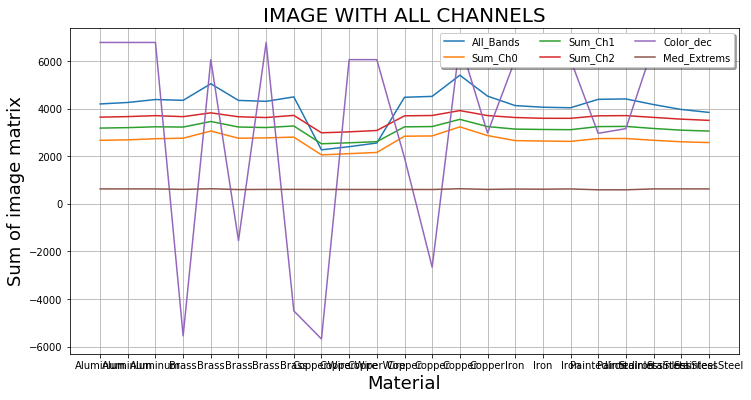

In [31]:
df_plot.plot(y=["All_Bands","Sum_Ch0","Sum_Ch1", "Sum_Ch2","Color_dec","Med_Extrems"],
             figsize=(12,6), grid=True )

# Obtain legend (xticks) for X axis
loc_Array_sum = np.arange(len(df_plot.index))
# Position of X labels
xtick_loc = list(loc_Array_sum)  
# Name of x labels
xticks = list(df_plot.Material)
#-------

#plt.plot(df_plot.Array_sum)
plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.xticks(xtick_loc, df_plot.Material, rotation=0)
plt.xlabel('Material',fontsize=18)
plt.legend(loc='upper right', ncol=3, fancybox=True, shadow=True)
plt.show()

In [32]:
# Create pivot table
df_plot1 = df_plot.groupby('Material')['All_Bands', 'Sum_Ch0','Sum_Ch1','Sum_Ch2','Color_dec',
                                       'Med_Extrems', 'Max_Histog', 'Idx_Max_Histog','Min_Histog','Idx_Min_Histog'].mean()
df_plot1

All_Bands      Sum_Ch0      Sum_Ch1      Sum_Ch2  \
Material                                                             
Aluminum        4277.728115  2697.020031  3205.956262  3669.719118   
Brass           4506.168379  2828.479558  3276.840011  3695.816106   
Copper          4729.162088  2948.215790  3318.163730  3757.749864   
CopperWire      2407.890270  2107.781424  2565.866045  3029.210097   
Iron            4072.831645  2638.765752  3125.546401  3603.486789   
PaintedIron     4397.464856  2743.132001  3248.184157  3701.115994   
StainlessSteel  3991.048135  2616.679198  3105.091056  3564.245177   

                  Color_dec  Med_Extrems   Max_Histog  Idx_Max_Histog  \
Material                                                                
Aluminum        6777.183000   627.277778   800.106667     1147.000000   
Brass            250.169200   611.566667   810.312200     1170.000000   
Copper          2257.391750   611.958333   776.630000     1186.250000   
CopperWire      2146.004667   603.944444   327.508333     1053.000000   
Iron            6143.689667   621.166667   447.432667     1172.333333   
PaintedIron     3060.543000   589.833333  1173.075500     1146.500000   
StainlessSteel  6252.916333   627.500000   562.516333     1152.000000   

                Min_Histog  Idx_Min_Histog  
Material                                    
Aluminum         66.666667     1673.333333  
Brass           140.000000     1560.000000  
Copper            0.000000      500.000000  
CopperWire        0.000000     1393.333333  
Iron              0.000000     2400.000000  
PaintedIron       0.000000       30.000000  
StainlessSteel  366.666667     2533.333333

In [33]:
color = ['red','blue','green','orange','cyan','black','yellow']

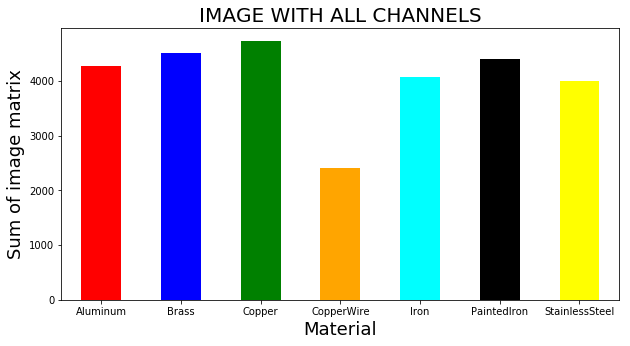

In [34]:
df_All_Bands = pd.DataFrame(df_plot1.All_Bands)

df_All_Bands.plot(kind='bar', y=0, color=color, legend=False, rot=0, figsize=(10,5))
plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.show()

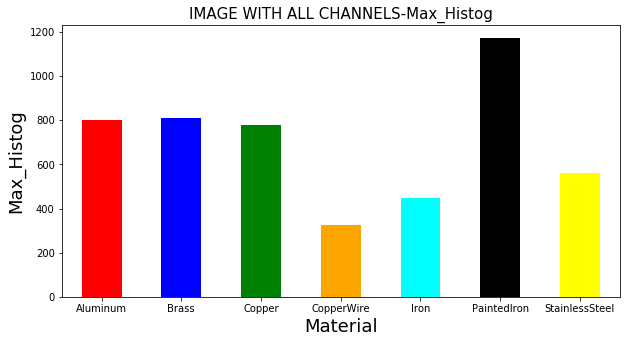

In [35]:
df_Max_Histog = pd.DataFrame(df_plot1.Max_Histog)

df_Max_Histog.plot(kind='bar', y=0, color=color, legend=False, rot=0, figsize=(10,5))
plt.title('IMAGE WITH ALL CHANNELS-Max_Histog',fontsize=15)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Max_Histog',fontsize=18)
plt.show()

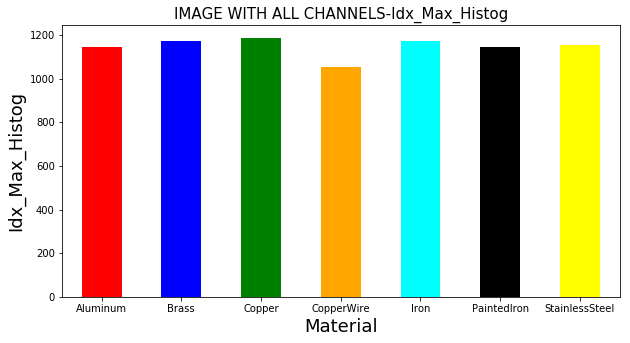

In [36]:
df_Idx_Max_Histog = pd.DataFrame(df_plot1.Idx_Max_Histog)

df_Idx_Max_Histog.plot(kind='bar', y=0, color=color, legend=False, rot=0, figsize=(10,5))
plt.title('IMAGE WITH ALL CHANNELS-Idx_Max_Histog',fontsize=15)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Idx_Max_Histog',fontsize=18)
plt.show()

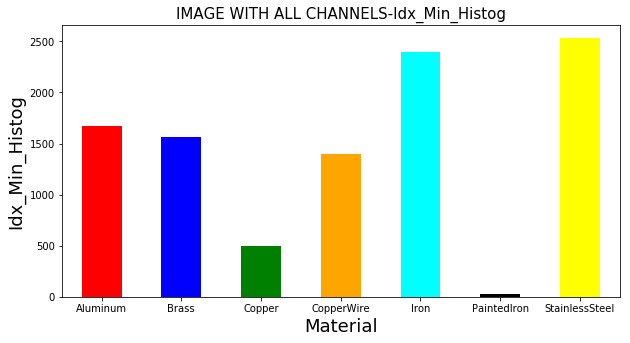

In [37]:
df_Idx_Min_Histog = pd.DataFrame(df_plot1.Idx_Min_Histog)

df_Idx_Min_Histog.plot(kind='bar', y=0, color=color, legend=False, rot=0, figsize=(10,5))
plt.title('IMAGE WITH ALL CHANNELS-Idx_Min_Histog',fontsize=15)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Idx_Min_Histog',fontsize=18)
plt.show()

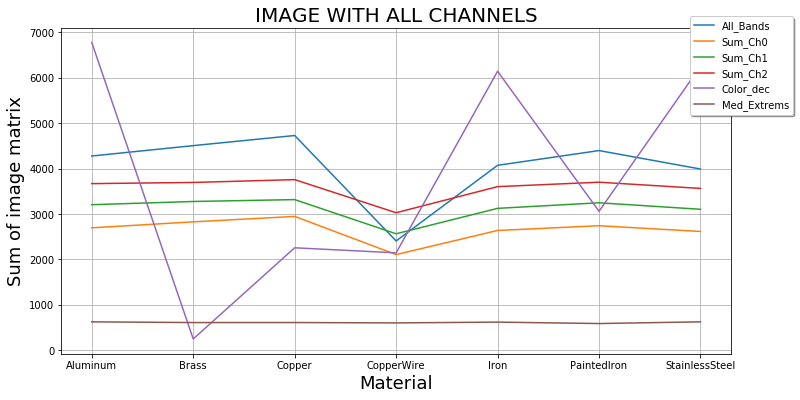

In [38]:
loc_Array_sum = np.arange(len(df_plot1.index))
xtick_loc = list(loc_Array_sum)  
xticks = list(df_plot1.index)

df_plot1.plot( y=["All_Bands","Sum_Ch0","Sum_Ch1", "Sum_Ch2","Color_dec","Med_Extrems"],
              figsize=(12,6), grid=True )
plt.xticks(xtick_loc, df_plot1.index, rotation=0)
plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.legend(loc='upper right', ncol=1, fancybox=True, shadow=True,bbox_to_anchor=(1.1, 1.05))
plt.show()

In [39]:
df_plot1

All_Bands      Sum_Ch0      Sum_Ch1      Sum_Ch2  \
Material                                                             
Aluminum        4277.728115  2697.020031  3205.956262  3669.719118   
Brass           4506.168379  2828.479558  3276.840011  3695.816106   
Copper          4729.162088  2948.215790  3318.163730  3757.749864   
CopperWire      2407.890270  2107.781424  2565.866045  3029.210097   
Iron            4072.831645  2638.765752  3125.546401  3603.486789   
PaintedIron     4397.464856  2743.132001  3248.184157  3701.115994   
StainlessSteel  3991.048135  2616.679198  3105.091056  3564.245177   

                  Color_dec  Med_Extrems   Max_Histog  Idx_Max_Histog  \
Material                                                                
Aluminum        6777.183000   627.277778   800.106667     1147.000000   
Brass            250.169200   611.566667   810.312200     1170.000000   
Copper          2257.391750   611.958333   776.630000     1186.250000   
CopperWire      2146.004667   603.944444   327.508333     1053.000000   
Iron            6143.689667   621.166667   447.432667     1172.333333   
PaintedIron     3060.543000   589.833333  1173.075500     1146.500000   
StainlessSteel  6252.916333   627.500000   562.516333     1152.000000   

                Min_Histog  Idx_Min_Histog  
Material                                    
Aluminum         66.666667     1673.333333  
Brass           140.000000     1560.000000  
Copper            0.000000      500.000000  
CopperWire        0.000000     1393.333333  
Iron              0.000000     2400.000000  
PaintedIron       0.000000       30.000000  
StainlessSteel  366.666667     2533.333333

In [40]:
# Copy dataframe to arrange values
df_plot2 =  df_plot1.copy() 
df_plot2

All_Bands      Sum_Ch0      Sum_Ch1      Sum_Ch2  \
Material                                                             
Aluminum        4277.728115  2697.020031  3205.956262  3669.719118   
Brass           4506.168379  2828.479558  3276.840011  3695.816106   
Copper          4729.162088  2948.215790  3318.163730  3757.749864   
CopperWire      2407.890270  2107.781424  2565.866045  3029.210097   
Iron            4072.831645  2638.765752  3125.546401  3603.486789   
PaintedIron     4397.464856  2743.132001  3248.184157  3701.115994   
StainlessSteel  3991.048135  2616.679198  3105.091056  3564.245177   

                  Color_dec  Med_Extrems   Max_Histog  Idx_Max_Histog  \
Material                                                                
Aluminum        6777.183000   627.277778   800.106667     1147.000000   
Brass            250.169200   611.566667   810.312200     1170.000000   
Copper          2257.391750   611.958333   776.630000     1186.250000   
CopperWire      2146.004667   603.944444   327.508333     1053.000000   
Iron            6143.689667   621.166667   447.432667     1172.333333   
PaintedIron     3060.543000   589.833333  1173.075500     1146.500000   
StainlessSteel  6252.916333   627.500000   562.516333     1152.000000   

                Min_Histog  Idx_Min_Histog  
Material                                    
Aluminum         66.666667     1673.333333  
Brass           140.000000     1560.000000  
Copper            0.000000      500.000000  
CopperWire        0.000000     1393.333333  
Iron              0.000000     2400.000000  
PaintedIron       0.000000       30.000000  
StainlessSteel  366.666667     2533.333333

In [41]:
df_plot2.Med_Extrems    = df_plot2.Med_Extrems + 2000
df_plot2.Max_Histog     = df_plot2.Max_Histog  + 1500
df_plot2.Idx_Max_Histog = df_plot2.Idx_Max_Histog + 1000
df_plot2.Min_Histog     = df_plot2.Min_Histog + 500
df_plot2.Idx_Min_Histog = df_plot2.Idx_Min_Histog - 1000
df_plot2.head()

All_Bands      Sum_Ch0      Sum_Ch1      Sum_Ch2    Color_dec  \
Material                                                                      
Aluminum    4277.728115  2697.020031  3205.956262  3669.719118  6777.183000   
Brass       4506.168379  2828.479558  3276.840011  3695.816106   250.169200   
Copper      4729.162088  2948.215790  3318.163730  3757.749864  2257.391750   
CopperWire  2407.890270  2107.781424  2565.866045  3029.210097  2146.004667   
Iron        4072.831645  2638.765752  3125.546401  3603.486789  6143.689667   

            Med_Extrems   Max_Histog  Idx_Max_Histog  Min_Histog  \
Material                                                           
Aluminum    2627.277778  2300.106667     2147.000000  566.666667   
Brass       2611.566667  2310.312200     2170.000000  640.000000   
Copper      2611.958333  2276.630000     2186.250000  500.000000   
CopperWire  2603.944444  1827.508333     2053.000000  500.000000   
Iron        2621.166667  1947.432667     2172.333333  500.000000   

            Idx_Min_Histog  
Material                    
Aluminum        673.333333  
Brass           560.000000  
Copper         -500.000000  
CopperWire      393.333333  
Iron           1400.000000

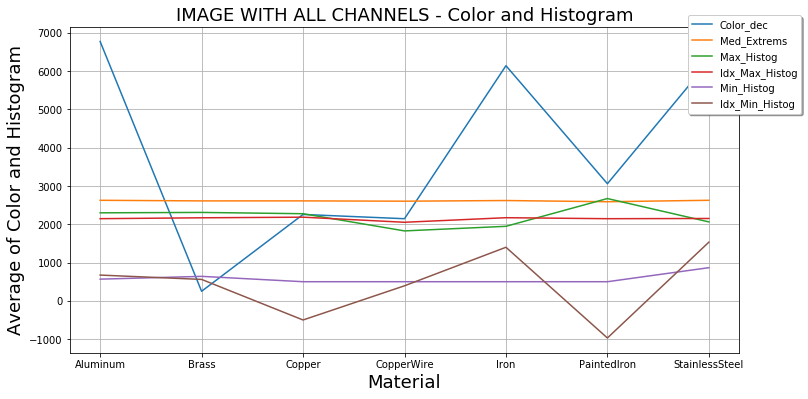

In [42]:
loc_Array_sum = np.arange(len(df_plot2.index))
xtick_loc = list(loc_Array_sum)  
xticks = list(df_plot1.index)

df_plot2.plot( y=['Color_dec','Med_Extrems', 'Max_Histog', 'Idx_Max_Histog',
                  'Min_Histog','Idx_Min_Histog'],figsize=(12,6), grid=True )
plt.xticks(xtick_loc, df_plot2.index, rotation=0)
plt.title('IMAGE WITH ALL CHANNELS - Color and Histogram',fontsize=18)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Average of Color and Histogram',fontsize=18)
plt.legend(loc='upper right', ncol=1, fancybox=True, shadow=True,bbox_to_anchor=(1.1, 1.05))
plt.show()

In [43]:
loc_Array_sum = np.arange(len(df_plot1.index))+0.1 # Offsetting the tick-label location
loc_r = np.arange(len(df_plot1.index))-0.1 # Offsetting the tick-label location
loc_g = np.arange(len(df_plot1.index))-0.3 # Offsetting the tick-label location
loc_b = np.arange(len(df_plot1.index))-0.5 # Offsetting the tick-label location

xtick_loc = list(loc_g)  
xticks = list(df_plot1.index)

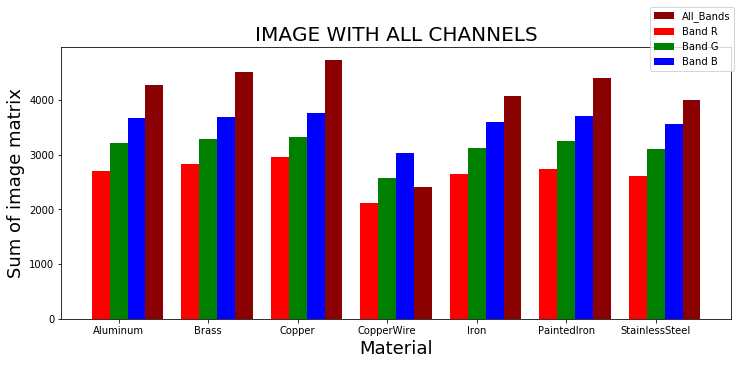

In [44]:
#Plot  Bar Graph
#df_plot1.plot(kind='bar', figsize=(12,5), grid=True, color='darkred',fontsize=18)
loc_Array_sum = np.arange(len(df_plot1.index))+0.1 # Offsetting the tick-label location
loc_b = np.arange(len(df_plot1.index))-0.1 # Offsetting the tick-label location
loc_g = np.arange(len(df_plot1.index))-0.3 # Offsetting the tick-label location
loc_r = np.arange(len(df_plot1.index))-0.5 # Offsetting the tick-label location

#xtick_loc = list(loc_Array_sum) + list(loc_r) + list(loc_g) + list(loc_b)
#xticks = list(selected.keys())+ list(rejected.keys())
colors = ['darkred','red','green','blue','orange','cyan','black','yellow']
plt.figure(figsize=(12,5))

plt.bar(loc_Array_sum, df_plot1.All_Bands, color=colors[0], width=0.2, label='All_Bands')
plt.bar(loc_r, df_plot1.Sum_Ch0, color=colors[1], width=0.2,label='Band R')
plt.bar(loc_g, df_plot1.Sum_Ch1, color=colors[2], width=0.2,label='Band G')
plt.bar(loc_b, df_plot1.Sum_Ch2, color=colors[3], width=0.2,label='Band B')

plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.xticks(xtick_loc, xticks, rotation=0)
plt.legend(bbox_to_anchor=(.8,0.8),\
    bbox_transform=plt.gcf().transFigure)

plt.show()

<Figure size 432x288 with 0 Axes>

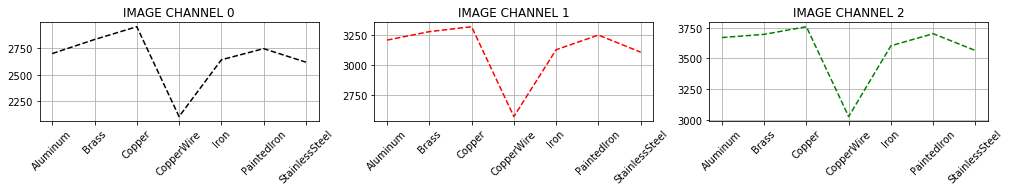

In [45]:
plt.figure(1)
plt.figure(figsize=(17, 4))
plt.tight_layout()
plt.subplot(231)
plt.title('IMAGE CHANNEL 0')
plt.xticks(rotation=45)
plt.grid(True)
plt.plot(df_plot1.Sum_Ch0, 'k--')

plt.subplot(232)
plt.title('IMAGE CHANNEL 1')
plt.xticks(rotation=45)
plt.grid(True)
plt.plot(df_plot1.Sum_Ch1,  'r--')

plt.subplot(233)
plt.title('IMAGE CHANNEL 2')
plt.xticks(rotation=45)
plt.plot(df_plot1.Sum_Ch2,  'g--')
plt.grid(True)
plt.show()

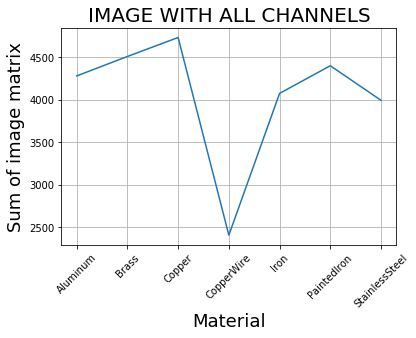

In [46]:
# Plot channel based
plt.plot(df_plot1.All_Bands)
plt.title('IMAGE WITH ALL CHANNELS',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Sum of image matrix',fontsize=18)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

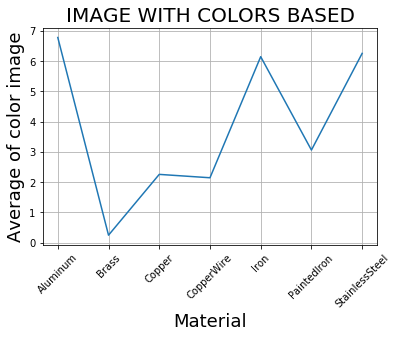

In [47]:
# Plot based on color
plt.plot(df_plot1.Color_dec/1000)
plt.title('IMAGE WITH COLORS BASED',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Average of color image',fontsize=18)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

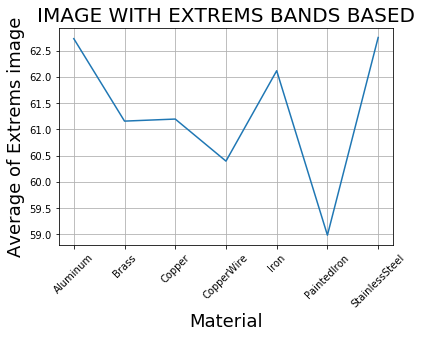

In [48]:
# Plot based on Extrems of the Bands
plt.plot(df_plot1.Med_Extrems/10)
plt.title('IMAGE WITH EXTREMS BANDS BASED',fontsize=20)
plt.xlabel('Material',fontsize=18)
plt.ylabel('Average of Extrems image',fontsize=18)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Create Histograms

https://www.cambridgeincolour.com/pt-br/tutoriais/histograms1.htm

https://www.cambridgeincolour.com/pt-br/tutoriais/image-noise.htm

http://www2.ic.uff.br/~aconci/aula-2-2015-AI.pdf

https://www.ic.unicamp.br/~ra144681/misc/files/ApostilaProcDeImagesParteI.pdf

histograma, também conhecido como distribuição de frequências ou diagrama das frequências, é a representação gráfica, em colunas (retângulos), de um conjunto de dados previamente tabulado e dividido em classes uniformes.

Histogramas:

O histograma de uma imagem cinza e uma funcao discreta h(l) (vetor) que produz o numero de ocorrencias de cada nıvel de cinza na imagem. O histograma normalizado h(l)/|DI | representa a distribuicao de probabilidade dos valores dos pixels.
 
Imagens claras possuem histogramas com altas concentracoes de pixels de alto brilho. Imagens escuras possuem histogramas com altas concentracoes de pixels de baixo brilho. O contraste maior esta associado a um grau maior de dispersao do histograma.

No caso de imagens multiespectrais, cada banda e´ requantizada em um certo numero de intervalos, de forma que o espaco de caracterısticas Zk ´e dividido em hipercubos (bins do histograma). A contagem de cores em cada bin ´e usada no c´alculo do histograma. Assim, para cada bin, precisamos analisar os n´ıveis de cinza das 3 bandas da imagem colorida (RGB).

Entendendo Histogramas:

O histograma mostra a frequencia dos valores de brilho da imagem, ou seja, a quantidade de luz presente na imagem. 


In [49]:
list_of_images

['Aluminum_1.jpg',
 'Aluminum_2.jpg',
 'Aluminum_3.jpg',
 'Brass_1.jpg',
 'Brass_2.jpg',
 'Brass_3.jpg',
 'Brass_4.jpg',
 'Brass_5.jpg',
 'CopperWire_1.jpg',
 'CopperWire_2.jpg',
 'CopperWire_3.jpg',
 'Copper_1.jpg',
 'Copper_2.jpg',
 'Copper_3.jpg',
 'Copper_4.jpg',
 'Iron_1.jpg',
 'Iron_2.jpg',
 'Iron_3.jpg',
 'PaintedIron_1.jpg',
 'PaintedIron_2.jpg',
 'StainlessSteel_1.jpg',
 'StainlessSteel_2.jpg',
 'StainlessSteel_3.jpg']

In [50]:
# Delete values from list - Bad image names
def remove_values_from_list(list_values, mask):
    list_new = list()
    for list_value in list_values:
        if(mask not in list_value):
            print(list_value)
            list_new.append(list_value)
    return list_new 

In [51]:
# Remove from list names with 'MASK'
new_list = remove_values_from_list(list_of_images, 'MASK')

Aluminum_1.jpg
Aluminum_2.jpg
Aluminum_3.jpg
Brass_1.jpg
Brass_2.jpg
Brass_3.jpg
Brass_4.jpg
Brass_5.jpg
CopperWire_1.jpg
CopperWire_2.jpg
CopperWire_3.jpg
Copper_1.jpg
Copper_2.jpg
Copper_3.jpg
Copper_4.jpg
Iron_1.jpg
Iron_2.jpg
Iron_3.jpg
PaintedIron_1.jpg
PaintedIron_2.jpg
StainlessSteel_1.jpg
StainlessSteel_2.jpg
StainlessSteel_3.jpg


In [52]:
# Remove from list names with 'Enh'
new_list = remove_values_from_list(new_list, 'Enh')

Aluminum_1.jpg
Aluminum_2.jpg
Aluminum_3.jpg
Brass_1.jpg
Brass_2.jpg
Brass_3.jpg
Brass_4.jpg
Brass_5.jpg
CopperWire_1.jpg
CopperWire_2.jpg
CopperWire_3.jpg
Copper_1.jpg
Copper_2.jpg
Copper_3.jpg
Copper_4.jpg
Iron_1.jpg
Iron_2.jpg
Iron_3.jpg
PaintedIron_1.jpg
PaintedIron_2.jpg
StainlessSteel_1.jpg
StainlessSteel_2.jpg
StainlessSteel_3.jpg


In [53]:
list_of_images = new_list

In [54]:
path = mypath + '/' + folder + '/'
path

'C:\\Users\\manuel.robalinho\\Google Drive\\UPT_Portucalense\\Trabalho final\\Classificacao_Sucata\\Jupyter_Notebook/imagedata05/'

Cv2 Histogram for File: Aluminum_1.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Aluminum_1.jpg


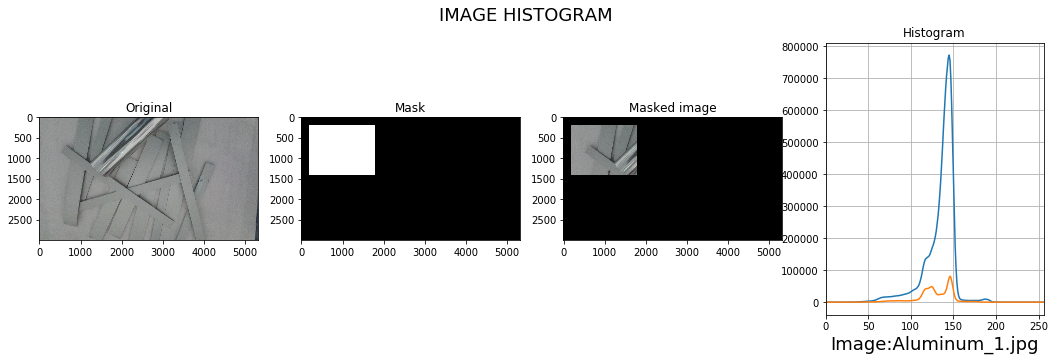

Cv2 Histogram for File: Aluminum_2.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Aluminum_2.jpg


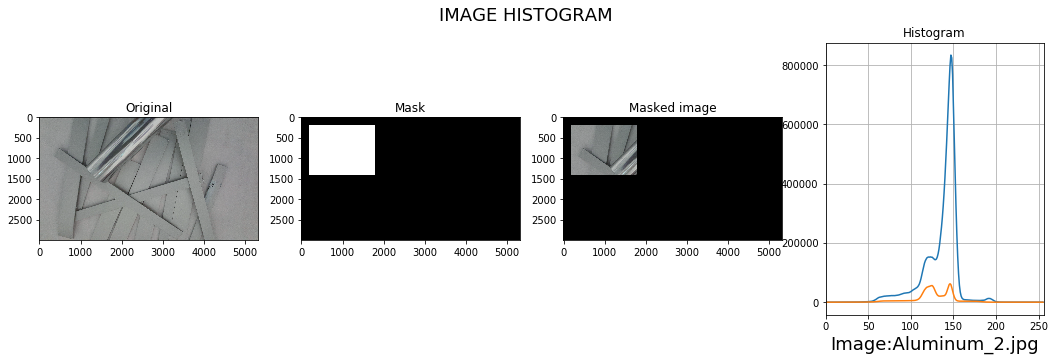

Cv2 Histogram for File: Aluminum_3.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Aluminum_3.jpg


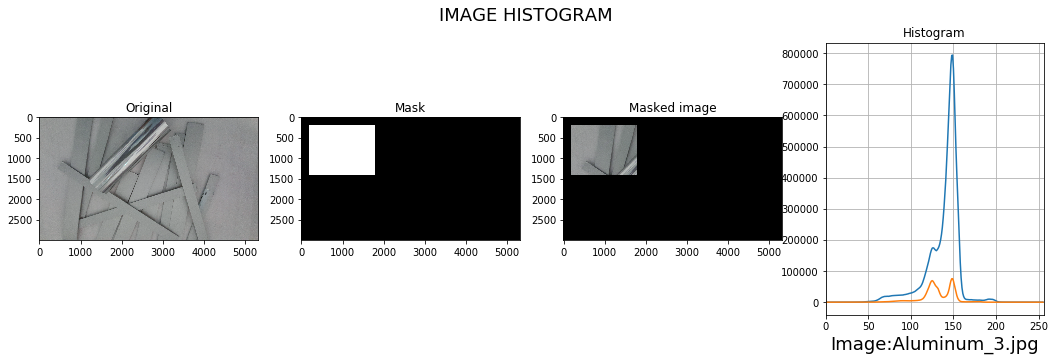

Cv2 Histogram for File: Brass_1.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Brass_1.jpg


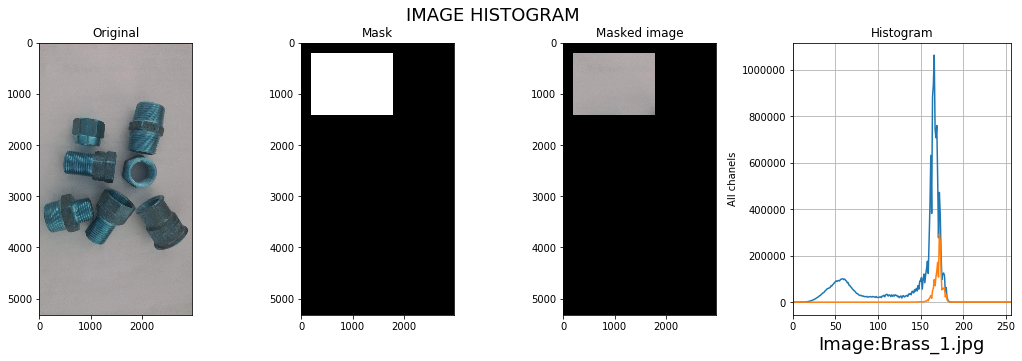

Cv2 Histogram for File: Brass_2.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Brass_2.jpg


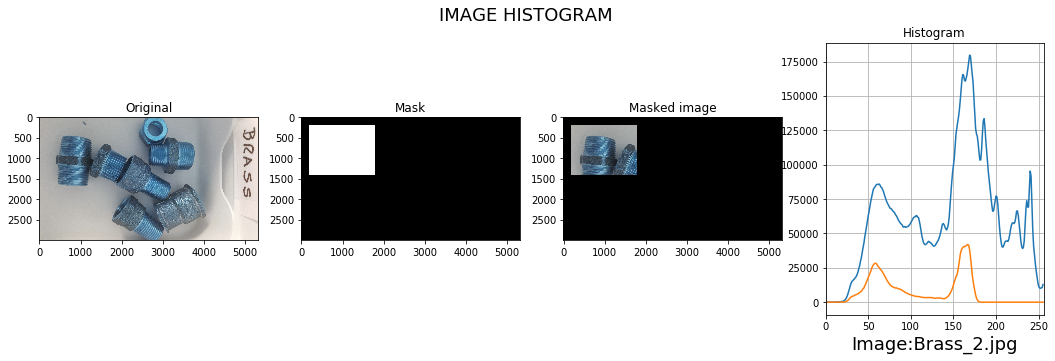

Cv2 Histogram for File: Brass_3.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Brass_3.jpg


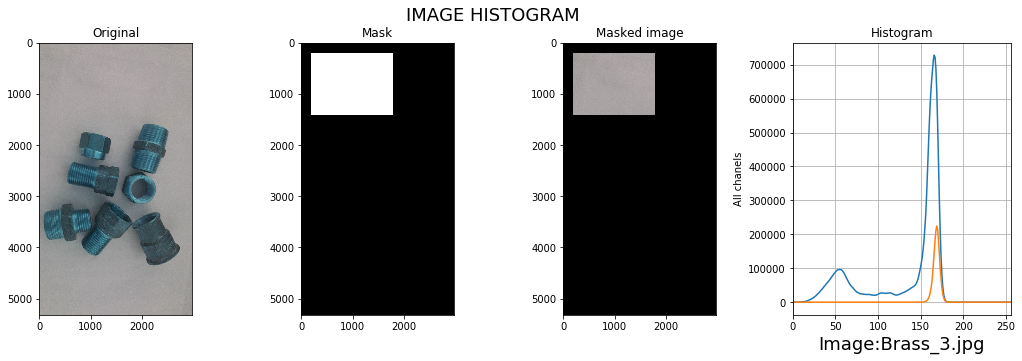

Cv2 Histogram for File: Brass_4.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Brass_4.jpg


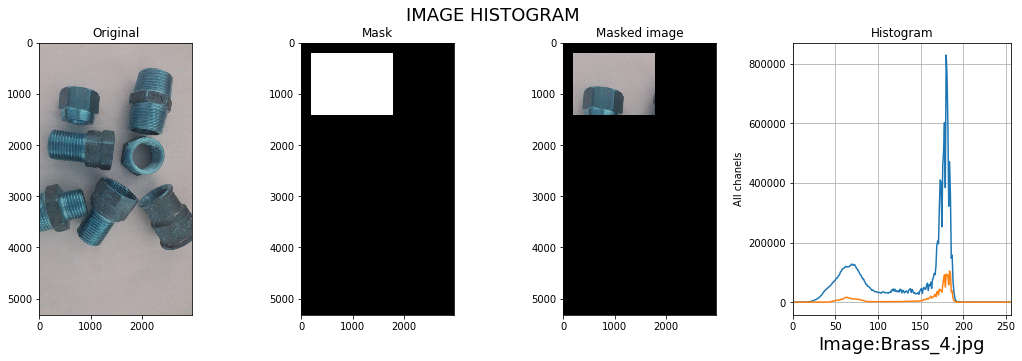

Cv2 Histogram for File: Brass_5.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Brass_5.jpg


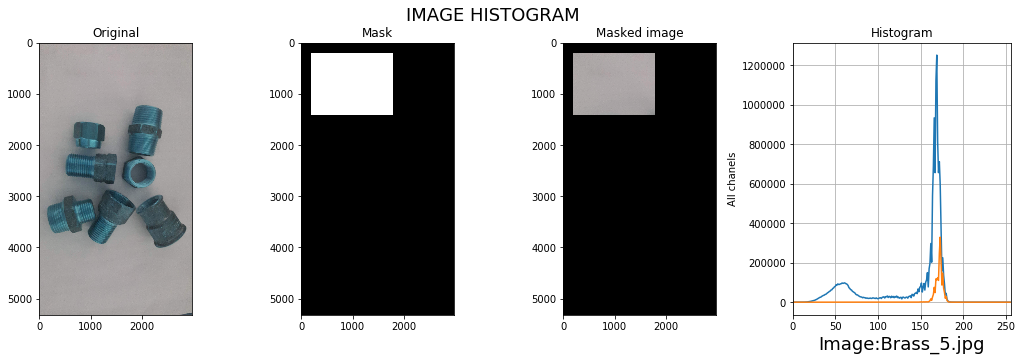

Cv2 Histogram for File: CopperWire_1.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/CopperWire_1.jpg


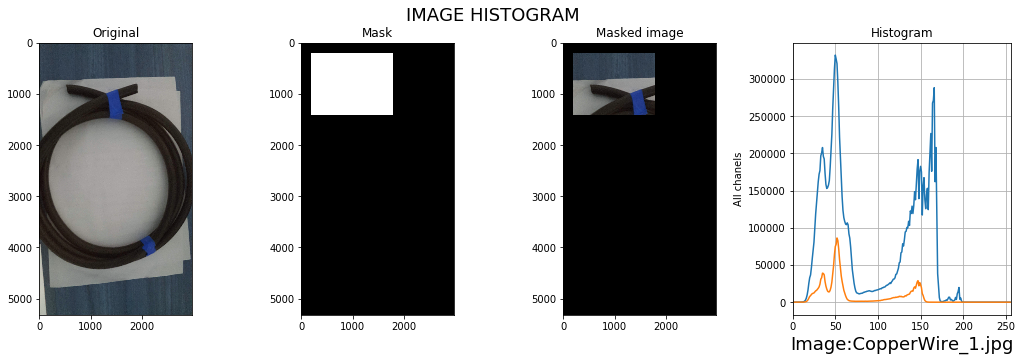

Cv2 Histogram for File: CopperWire_2.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/CopperWire_2.jpg


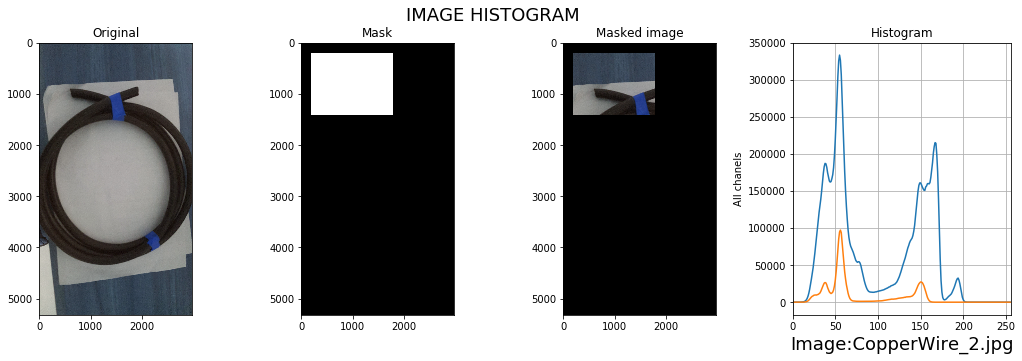

Cv2 Histogram for File: CopperWire_3.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/CopperWire_3.jpg


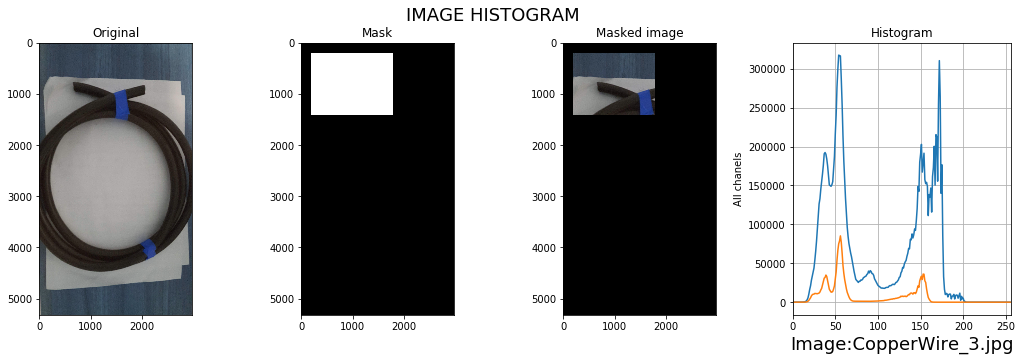

Cv2 Histogram for File: Copper_1.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Copper_1.jpg


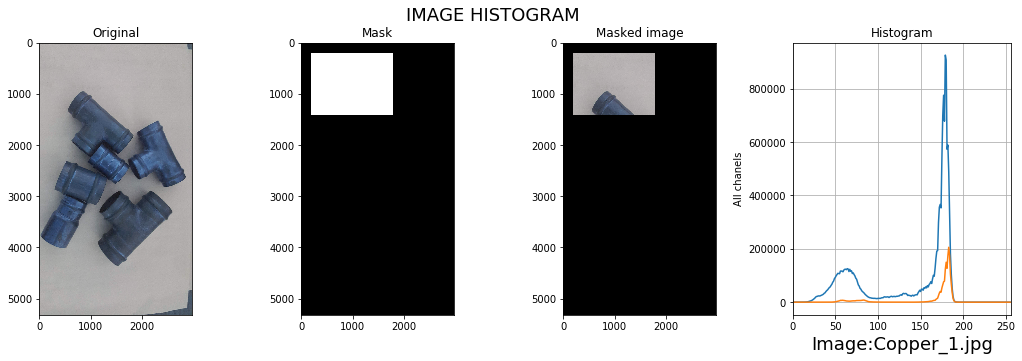

Cv2 Histogram for File: Copper_2.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Copper_2.jpg


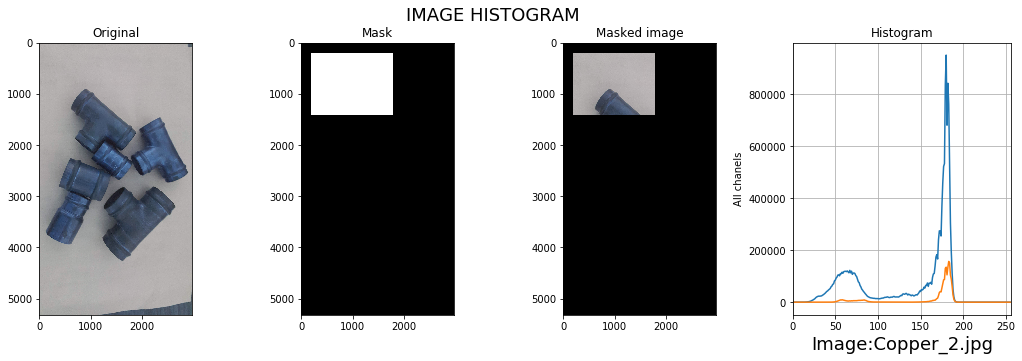

Cv2 Histogram for File: Copper_3.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Copper_3.jpg


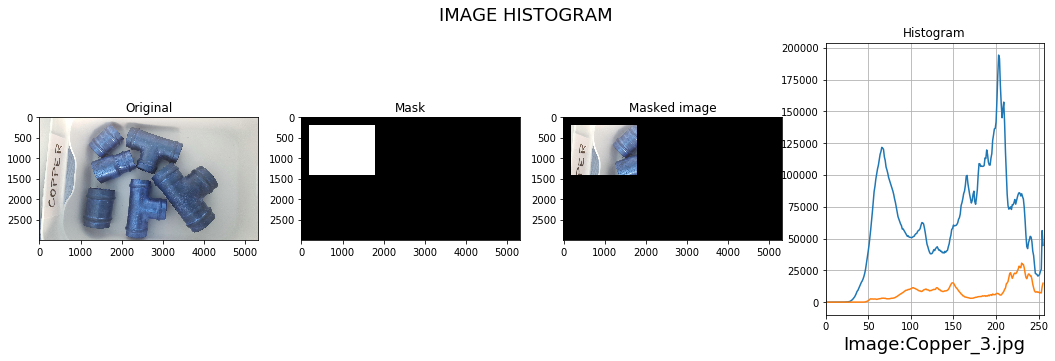

Cv2 Histogram for File: Copper_4.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Copper_4.jpg


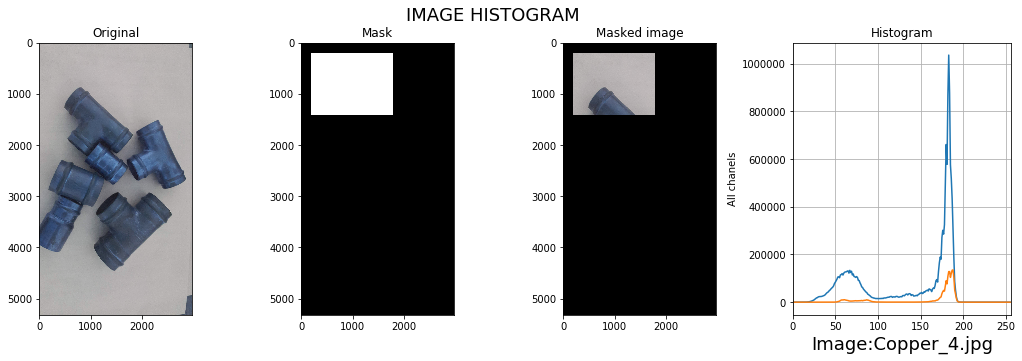

Cv2 Histogram for File: Iron_1.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Iron_1.jpg


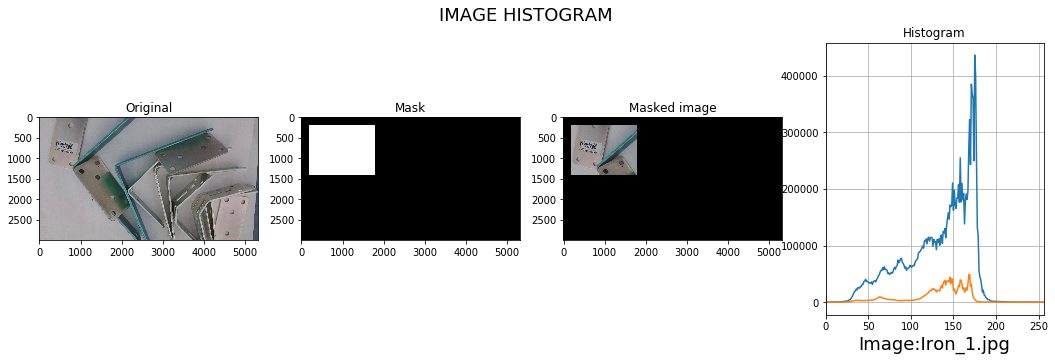

Cv2 Histogram for File: Iron_2.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Iron_2.jpg


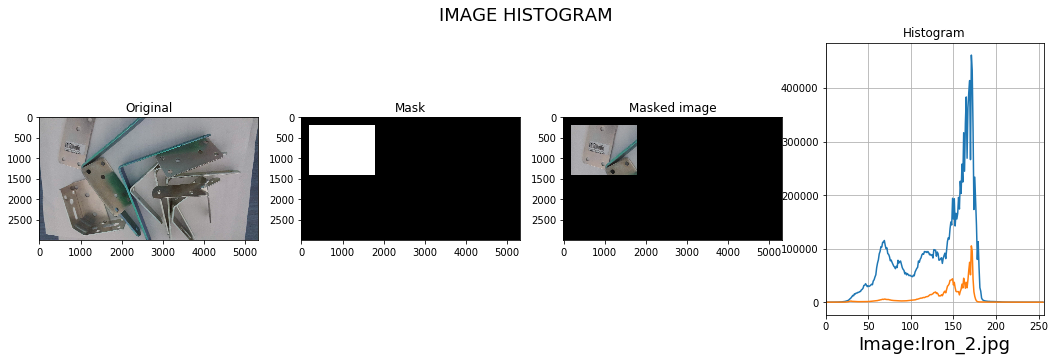

Cv2 Histogram for File: Iron_3.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Iron_3.jpg


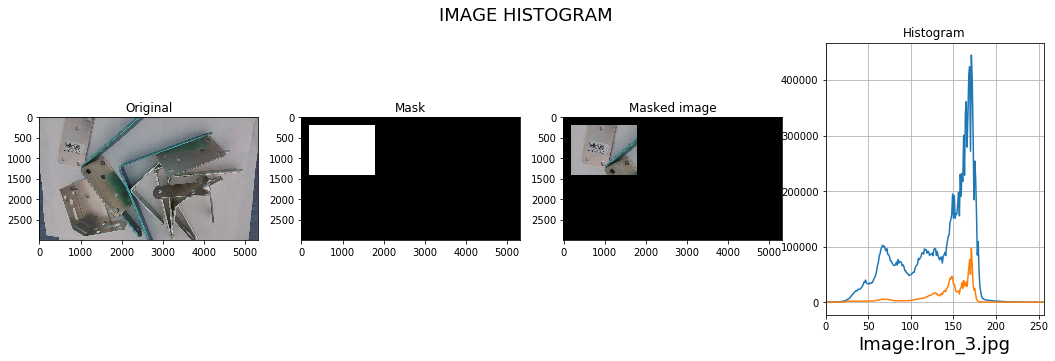

Cv2 Histogram for File: PaintedIron_1.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/PaintedIron_1.jpg


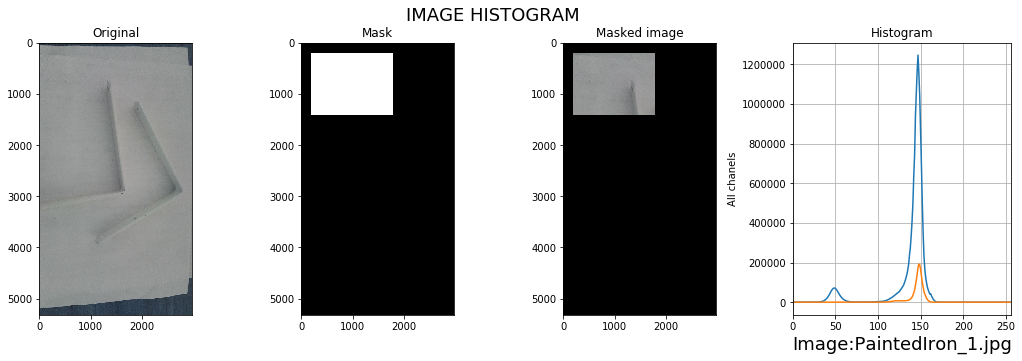

Cv2 Histogram for File: PaintedIron_2.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/PaintedIron_2.jpg


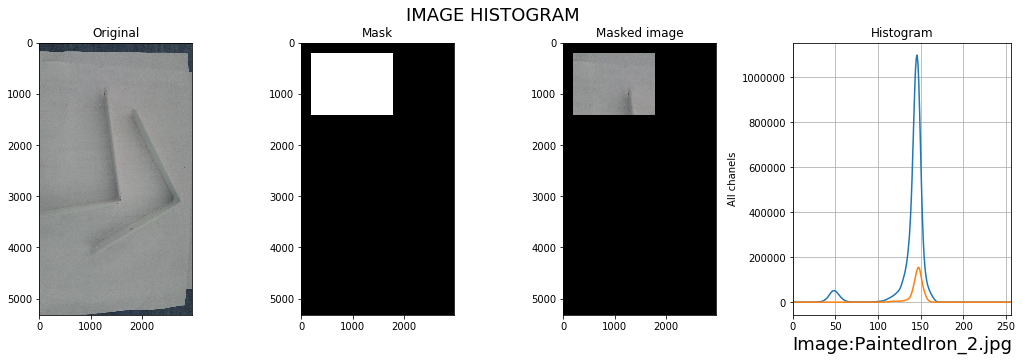

Cv2 Histogram for File: StainlessSteel_1.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/StainlessSteel_1.jpg


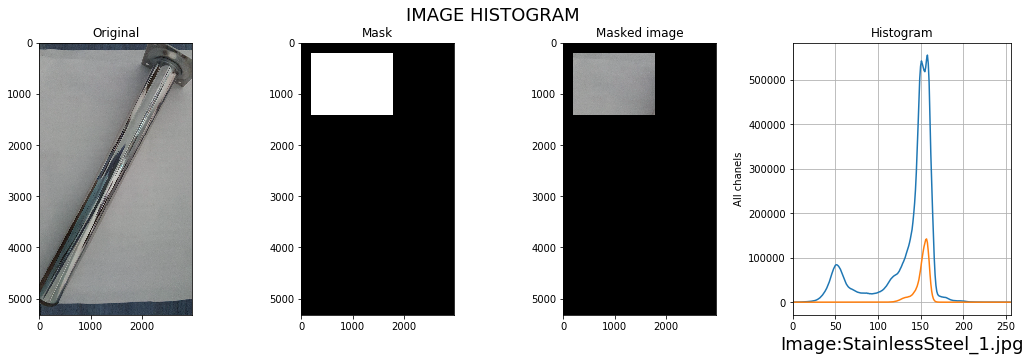

Cv2 Histogram for File: StainlessSteel_2.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/StainlessSteel_2.jpg


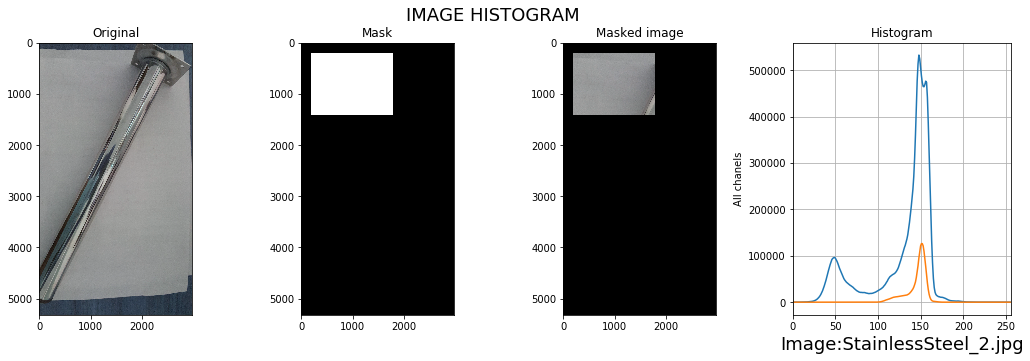

Cv2 Histogram for File: StainlessSteel_3.jpg
Cv2 Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/StainlessSteel_3.jpg


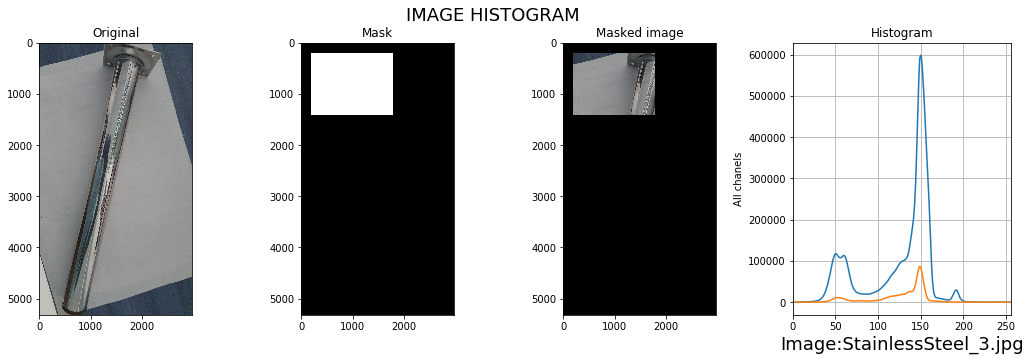

In [55]:
# HISTOGRAMS
# Print Histograms for all folder images
# list_of_images has all the name files

for x in list_of_images:
    print('Cv2 Histogram for File:', x)
    print_cv_hist(path, x)

Matplot Histogram for File: Aluminum_1.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Aluminum_1.jpg


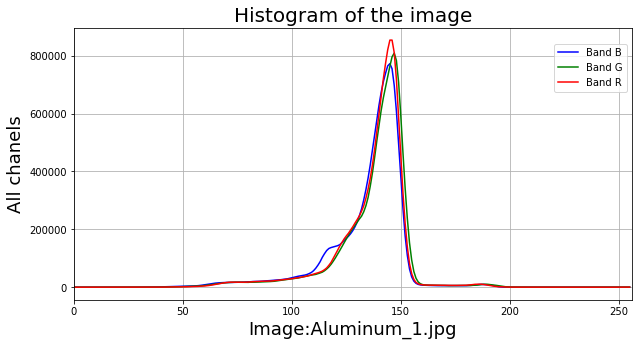

Matplot Histogram for File: Aluminum_2.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Aluminum_2.jpg


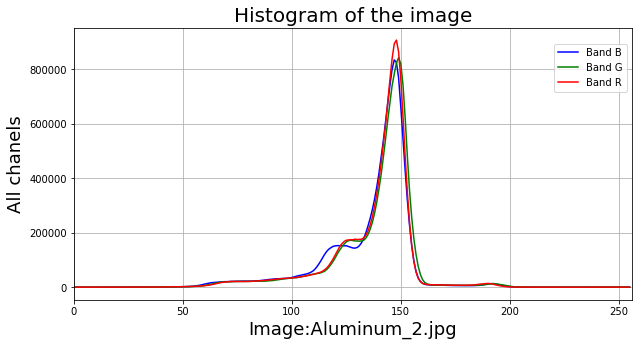

Matplot Histogram for File: Aluminum_3.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Aluminum_3.jpg


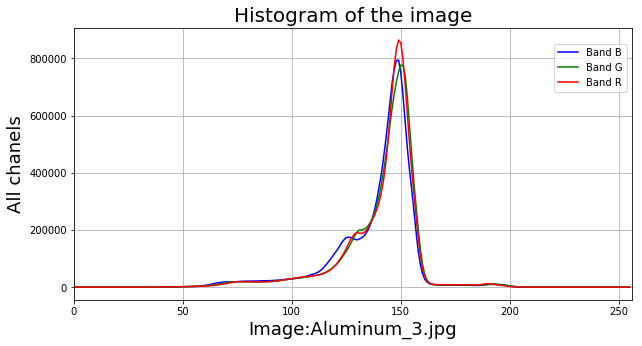

Matplot Histogram for File: Brass_1.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Brass_1.jpg


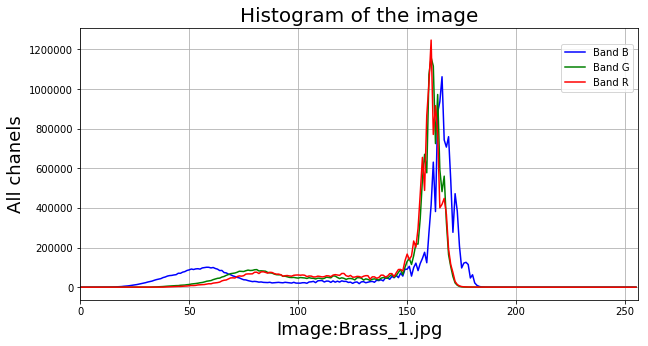

Matplot Histogram for File: Brass_2.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Brass_2.jpg


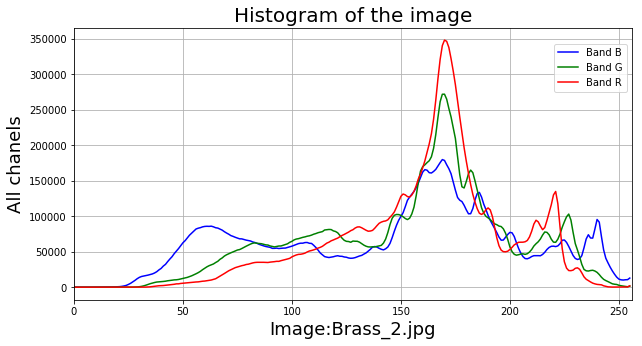

Matplot Histogram for File: Brass_3.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Brass_3.jpg


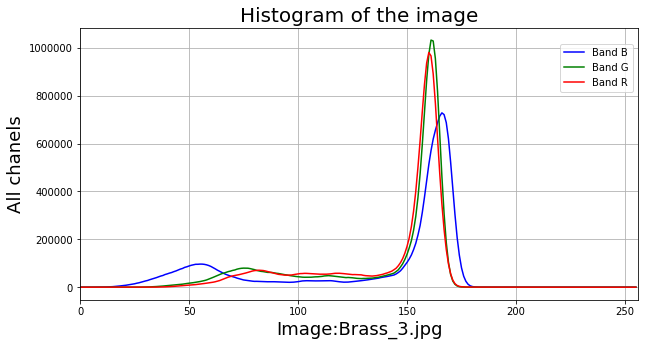

Matplot Histogram for File: Brass_4.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Brass_4.jpg


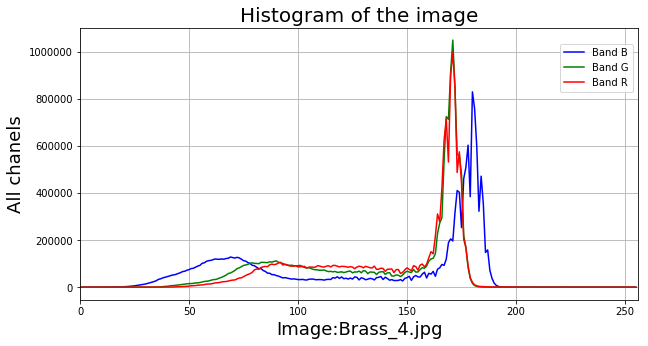

Matplot Histogram for File: Brass_5.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Brass_5.jpg


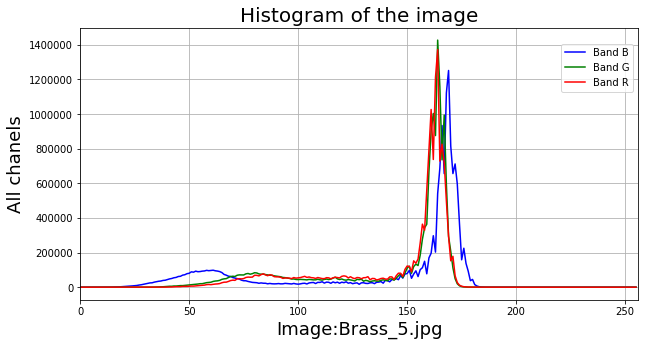

Matplot Histogram for File: CopperWire_1.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/CopperWire_1.jpg


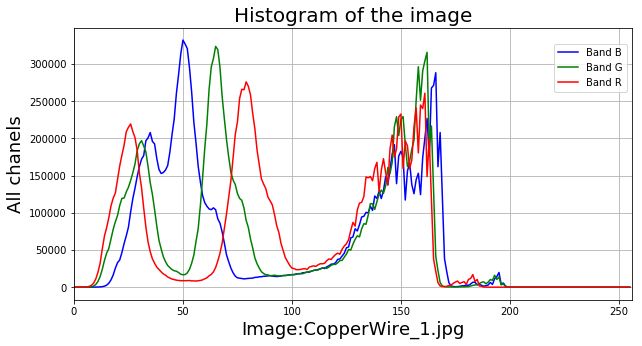

Matplot Histogram for File: CopperWire_2.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/CopperWire_2.jpg


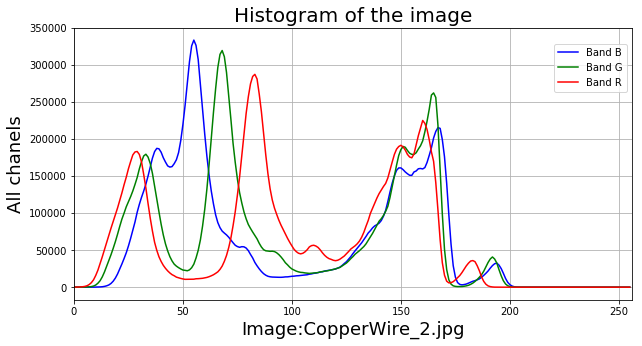

Matplot Histogram for File: CopperWire_3.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/CopperWire_3.jpg


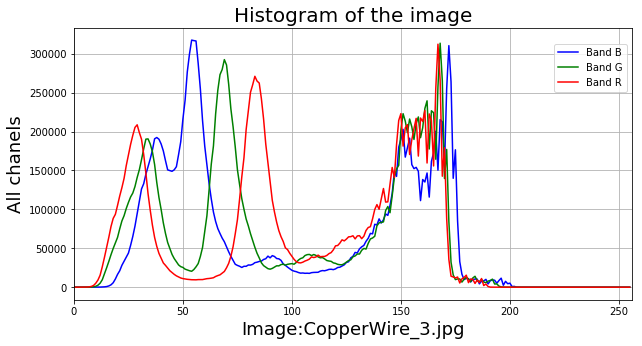

Matplot Histogram for File: Copper_1.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Copper_1.jpg


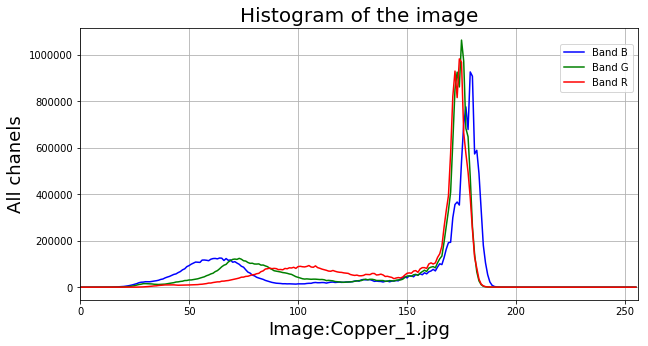

Matplot Histogram for File: Copper_2.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Copper_2.jpg


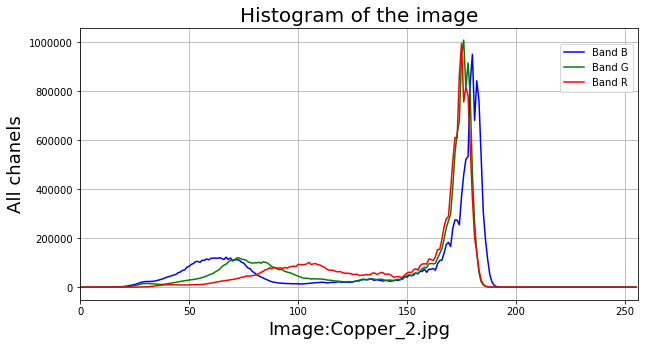

Matplot Histogram for File: Copper_3.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Copper_3.jpg


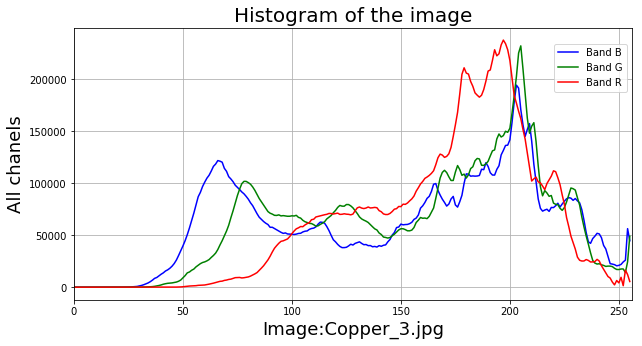

Matplot Histogram for File: Copper_4.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Copper_4.jpg


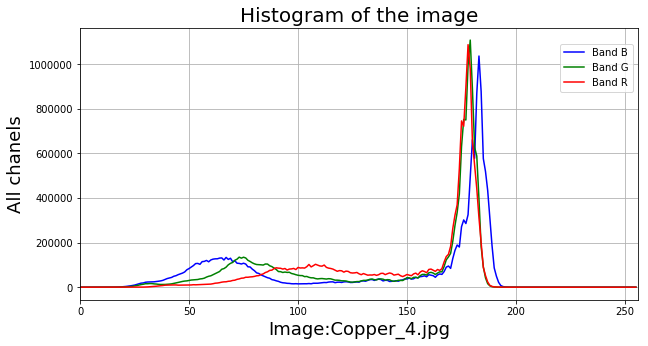

Matplot Histogram for File: Iron_1.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Iron_1.jpg


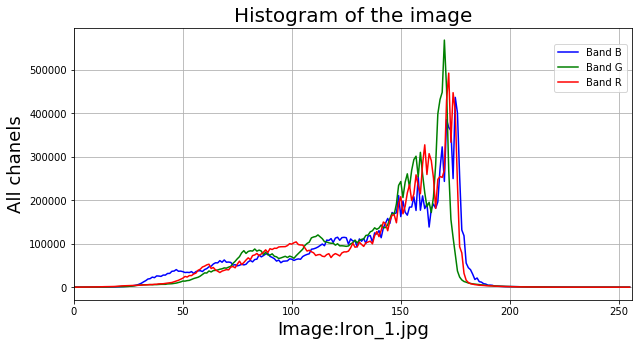

Matplot Histogram for File: Iron_2.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Iron_2.jpg


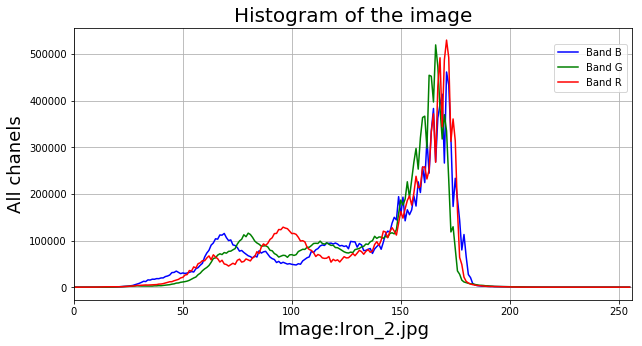

Matplot Histogram for File: Iron_3.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/Iron_3.jpg


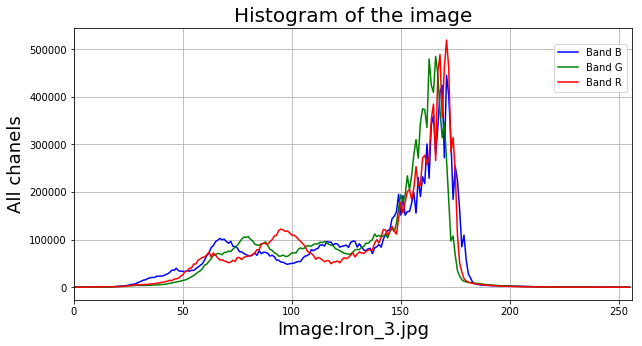

Matplot Histogram for File: PaintedIron_1.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/PaintedIron_1.jpg


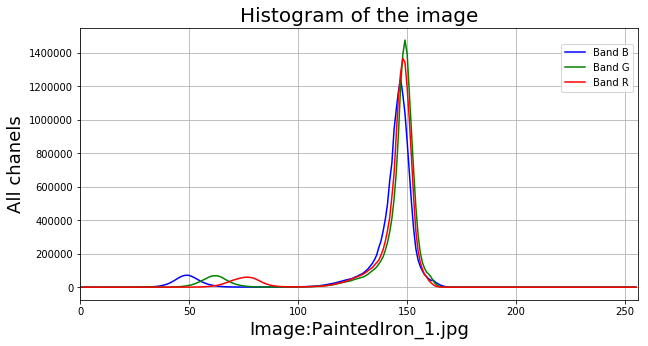

Matplot Histogram for File: PaintedIron_2.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/PaintedIron_2.jpg


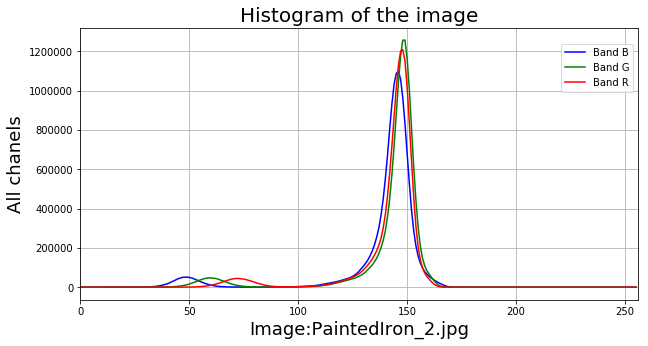

Matplot Histogram for File: StainlessSteel_1.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/StainlessSteel_1.jpg


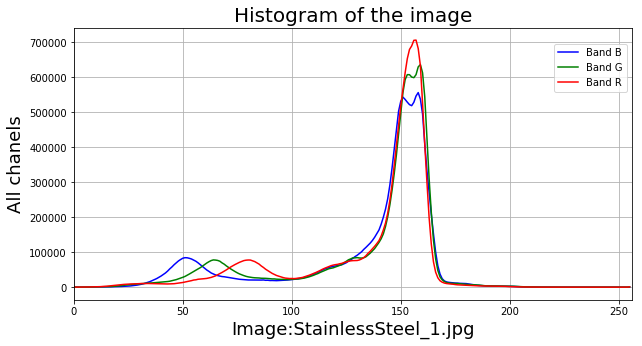

Matplot Histogram for File: StainlessSteel_2.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/StainlessSteel_2.jpg


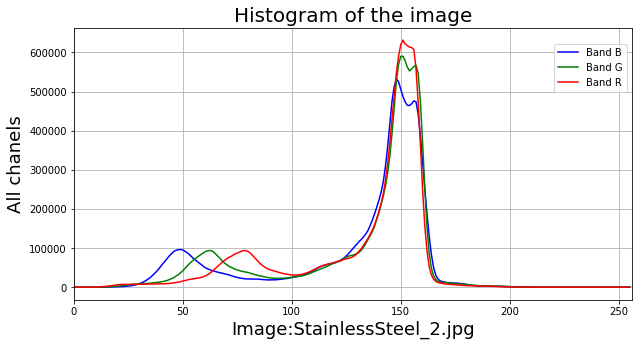

Matplot Histogram for File: StainlessSteel_3.jpg
Matplot Hist from file: C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook/imagedata05/StainlessSteel_3.jpg


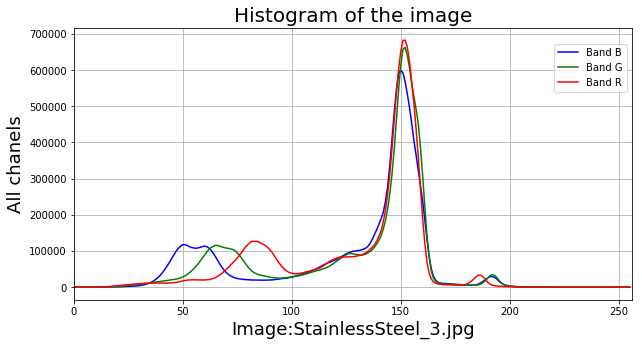

In [56]:
# HISTOGRAMS
# Print Histograms for all folder images
# list_of_images has all the name files

for x in list_of_images:
    print('Matplot Histogram for File:', x)
    print_matplot_hist(path, x)

In [57]:
print('Finished')

Finished
